Лосев Владислав. Сравнение и анализ вакансий аналитиков данных и бизнес-аналитиков на основе датасета с hh.ru

Целью данного проекта является выявление различий в вакансиях аналитиков данных и бизнес-аналитиков, а также
выделение основных требований(навыков) для аналитиков данных и бизнес-аналитиков в зависимости от их грейда. Также 
требуется получить
 и проанализировать для каждого грейда информацию об основных работодателях, заработной плате, графике работы 
    для анализа текущей ситуации на рынке труда.
    

План проекта:
  

1) Предобработка данных: посмотрим на целостность данных, наличие дубликатов,  почистим данные для дальнейшего анализа
    
2) Первичный анализ данных: в рамках первичного анализа исследуем распределения основных величин, определим возможные
    зависимости в данных, детально изучим основные категориальные  переменные
    
3) В рамках работы определим основные навыки и требования, которые указывает работодатель для аналитиков данных, а также
 для бизнес-аналитиков. Проведем исследование для каждого грейда, выделив основные soft и hard skills
    
4) У аналитиков данных  и бизнес аналитиков в зависимости от грейда определим зарплату, основных работодателей и различные 
характеристики, относящиеся к режиму работы

5) На основании полученных результатов сформулируем выводы по итогам работы, проанализируем рынок труда для аналитиков 
данных и бизнес аналитиков

На первом этапе ознакомимся с данными и проведем первичный анализ

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
! pip install missingno

In [4]:
import plotly.express as px

In [5]:
import missingno as msno

In [6]:
data_ba=pd.read_excel(r'C:\Users\Acer\Documents\data_analyst\vacancies_ba.xlsx')

In [7]:
data_da=pd.read_excel(r'C:\Users\Acer\Documents\data_analyst\vacancies_da.xlsx')

In [8]:
ba_shape=data_ba.shape[0]
da_shape=data_da.shape[0]

Создадим функцию для вывода основной информации о датасете

In [9]:
def data_info(data):
    '''Функция для вывода основной информации о датасете и пропущенных значениях'''
    print('Случайные 5 строк в датафрейме:')
    display(data.sample(5))
    print('Основная информация df.info():')
    print('_______________________________________________________________________')
    data.info()
    print('Кол-во пропущенных значений по столбцам')
    display(pd.DataFrame({'Количество пропущенных значений': data.isna().sum(), 
                         '% пропущенных значений': round(data.isna().sum()/data.shape[0]*100,2)}))
    print(f'Количество дубликатов: {data.duplicated().sum()}')


Визуализируем информацию о вакансиях бизнес-аналитиков

In [10]:
data_info(data_ba)

Случайные 5 строк в датафрейме:


id                                               name  \
347  94649475                                    Бизнес-аналитик   
899  95678171  Бизнес-аналитик на процессы БЕ Импорта (Собств...   
690  95254597                                 Бизнес-аналитик 1С   
141  92284850                           Бизнес-аналитик (OrgDev)   
246  93782194                                    Бизнес-аналитик   

           published_at                   alternate_url      type  \
347 2024-03-29 10:50:55  https://hh.ru/vacancy/94649475  Открытая   
899 2024-03-28 10:17:13  https://hh.ru/vacancy/95678171  Открытая   
690 2024-03-22 08:36:43  https://hh.ru/vacancy/95254597  Открытая   
141 2024-03-21 16:39:48  https://hh.ru/vacancy/92284850  Открытая   
246 2024-03-14 16:40:08  https://hh.ru/vacancy/93782194  Открытая   

                employer                  department             area  \
347  СтройБлокТехнология                         NaN  Санкт-Петербург   
899             Х5 Group  X5 GROUP, Центральный офис           Москва   
690          Ростсельмаш                         NaN   Ростов-на-Дону   
141          WILDBERRIES                         NaN           Москва   
246              LEGENDA                         NaN  Санкт-Петербург   

              experience                                         key_skills  \
347   Middle (3-6 years)                                   ['Документация']   
899  Junior+ (1-3 years)  ['Критическое мышление', 'MS PowerPoint', 'Биз...   
690   Middle (3-6 years)  ['Аналитическое мышление', 'Описание бизнес-пр...   
141   Middle (3-6 years)  ['Бизнес-анализ', 'Документация', 'Работа с бо...   
246   Middle (3-6 years)                   ['Документация', 'Коммуникация']   

             schedule        employment  \
347       Полный день  Полная занятость   
899  Удаленная работа  Полная занятость   
690       Полный день  Полная занятость   
141       Полный день  Полная занятость   
246       Полный день  Полная занятость   

                                           description  \
347  обязанности:   анализ существующих бизнес-проц...   
899  обязанности:  обработка запросов бизнес-заказч...   
690  обязанности:  проведение процедуры обследовани...   
141  wildberries – это крупнейший маркетплейс росси...   
246  legenda intelligent development - девелопер с ...   

                                description_lemmatized  salary_from  \
347  обязанность анализ существующий бизнес процесс...          NaN   
899  обязанность обработка запрос бизнес заказчик р...          NaN   
690  обязанность проведение процедура обследование ...          NaN   
141  wildberries крупный маркетплейс россия миллион...          NaN   
246  legenda intelligent development девелопер прог...          NaN   

     salary_to     salary_bin  \
347        NaN  ЗП не указана   
899        NaN  ЗП не указана   
690        NaN  ЗП не указана   
141        NaN  ЗП не указана   
246        NaN  ЗП не указана   

                      key_skills_from_key_skills_field  \
347                                                NaN   
899  Системное мышление, Бизнес-процессы, Бизнес-мо...   
690  Постановка задач разработчикам, 1С: Комплексна...   
141  Бизнес-анализ, Системный анализ, Разработка но...   
246                                                NaN   

    hard_skills_from_description           soft_skills_from_description  
347                          NaN                           Документация  
899                          NaN  Решение проблем, Критическое мышление  
690                          NaN                                    NaN  
141                          NaN                           Документация  
246                          NaN             Коммуникация, Документация

Основная информация df.info():
_______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills     

Количество пропущенных значений  \
id                                                              0   
name                                                            0   
published_at                                                    0   
alternate_url                                                   0   
type                                                            0   
employer                                                        0   
department                                                    801   
area                                                            0   
experience                                                      0   
key_skills                                                      0   
schedule                                                        0   
employment                                                      0   
description                                                     0   
description_lemmatized                                          0   
salary_from                                                   839   
salary_to                                                     879   
salary_bin                                                      0   
key_skills_from_key_skills_field                              445   
hard_skills_from_description                                  844   
soft_skills_from_description                                  393   

                                  % пропущенных значений  
id                                                  0.00  
name                                                0.00  
published_at                                        0.00  
alternate_url                                       0.00  
type                                                0.00  
employer                                            0.00  
department                                         79.23  
area                                                0.00  
experience                                          0.00  
key_skills                                          0.00  
schedule                                            0.00  
employment                                          0.00  
description                                         0.00  
description_lemmatized                              0.00  
salary_from                                        82.99  
salary_to                                          86.94  
salary_bin                                          0.00  
key_skills_from_key_skills_field                   44.02  
hard_skills_from_description                       83.48  
soft_skills_from_description                       38.87

Количество дубликатов: 0


Визуализация целостности данных:


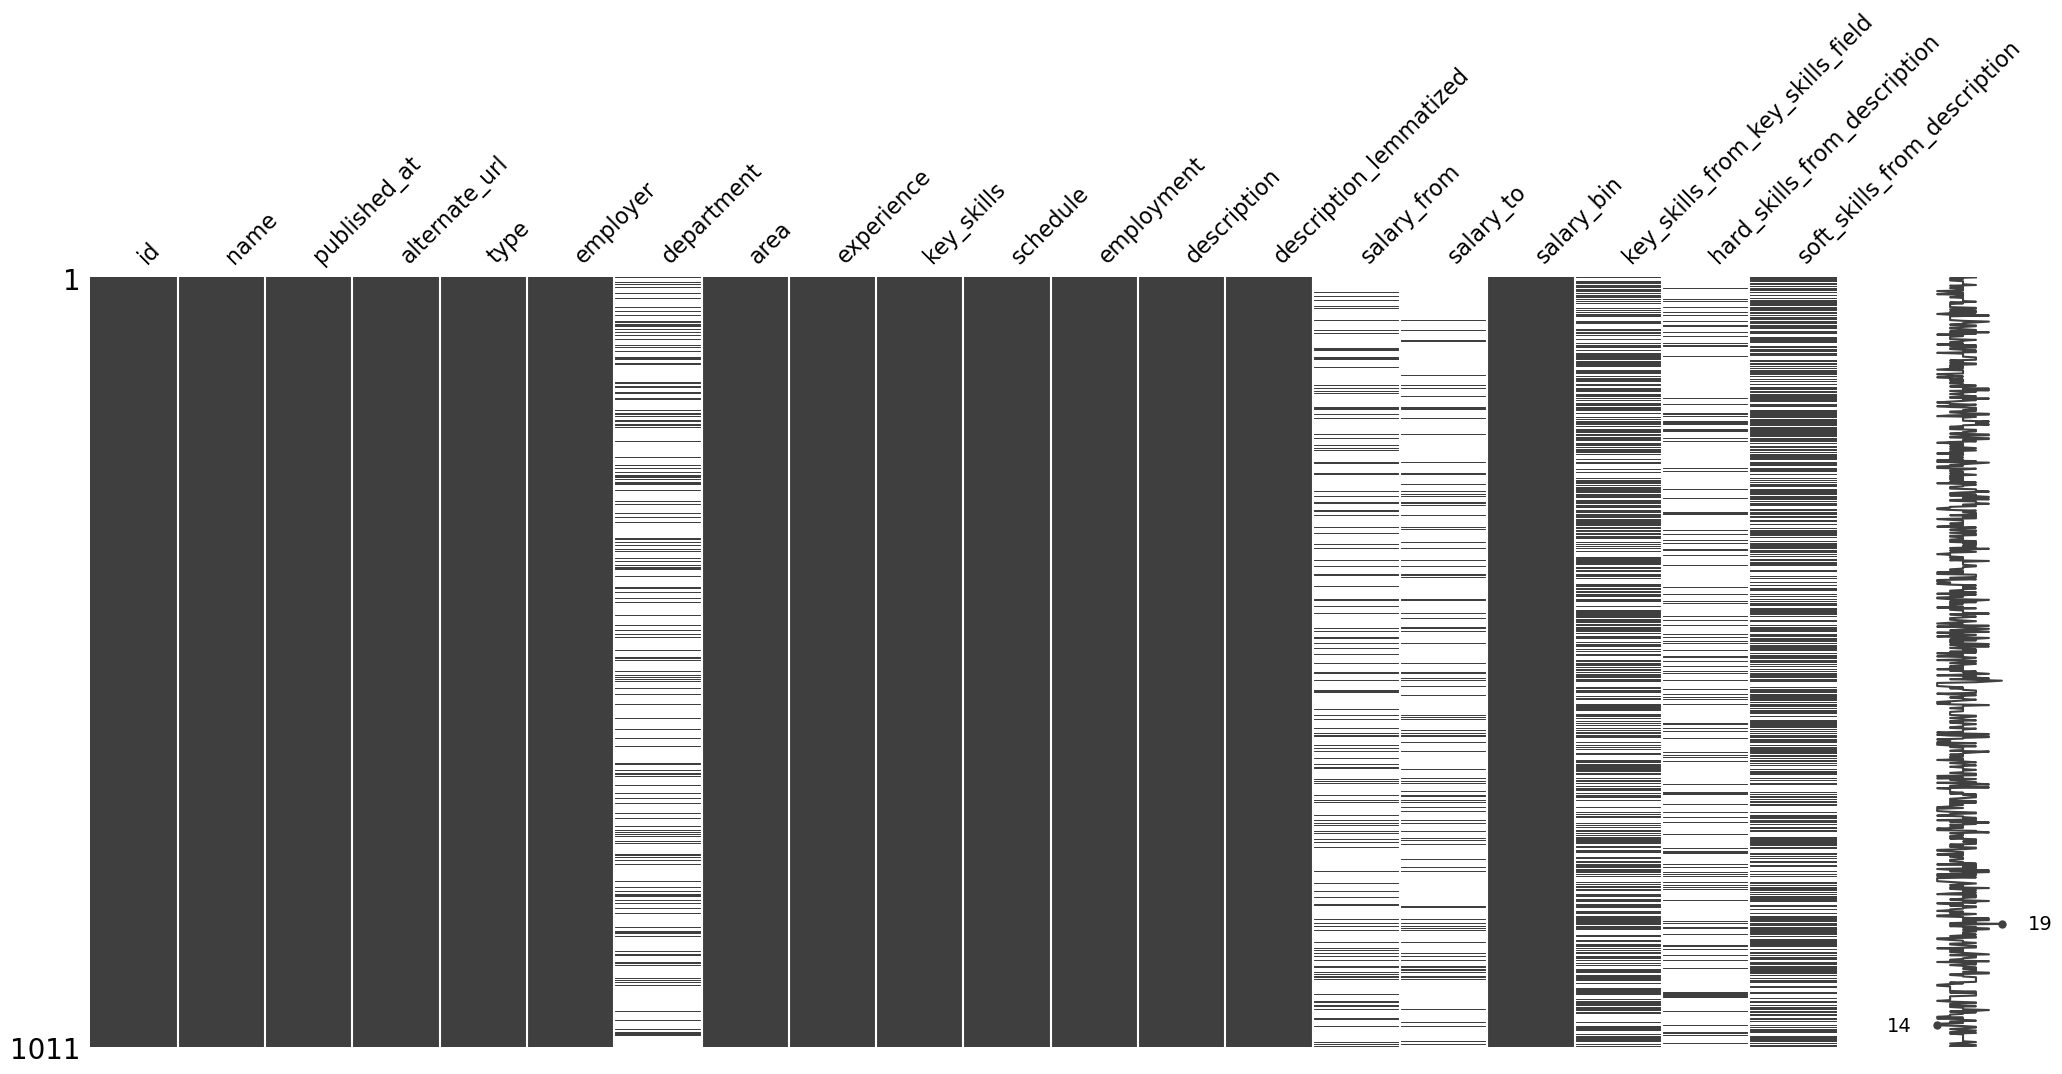

In [11]:
print('Визуализация целостности данных:')
msno.matrix(data_ba);


Визуализация пропусков по столбцам:


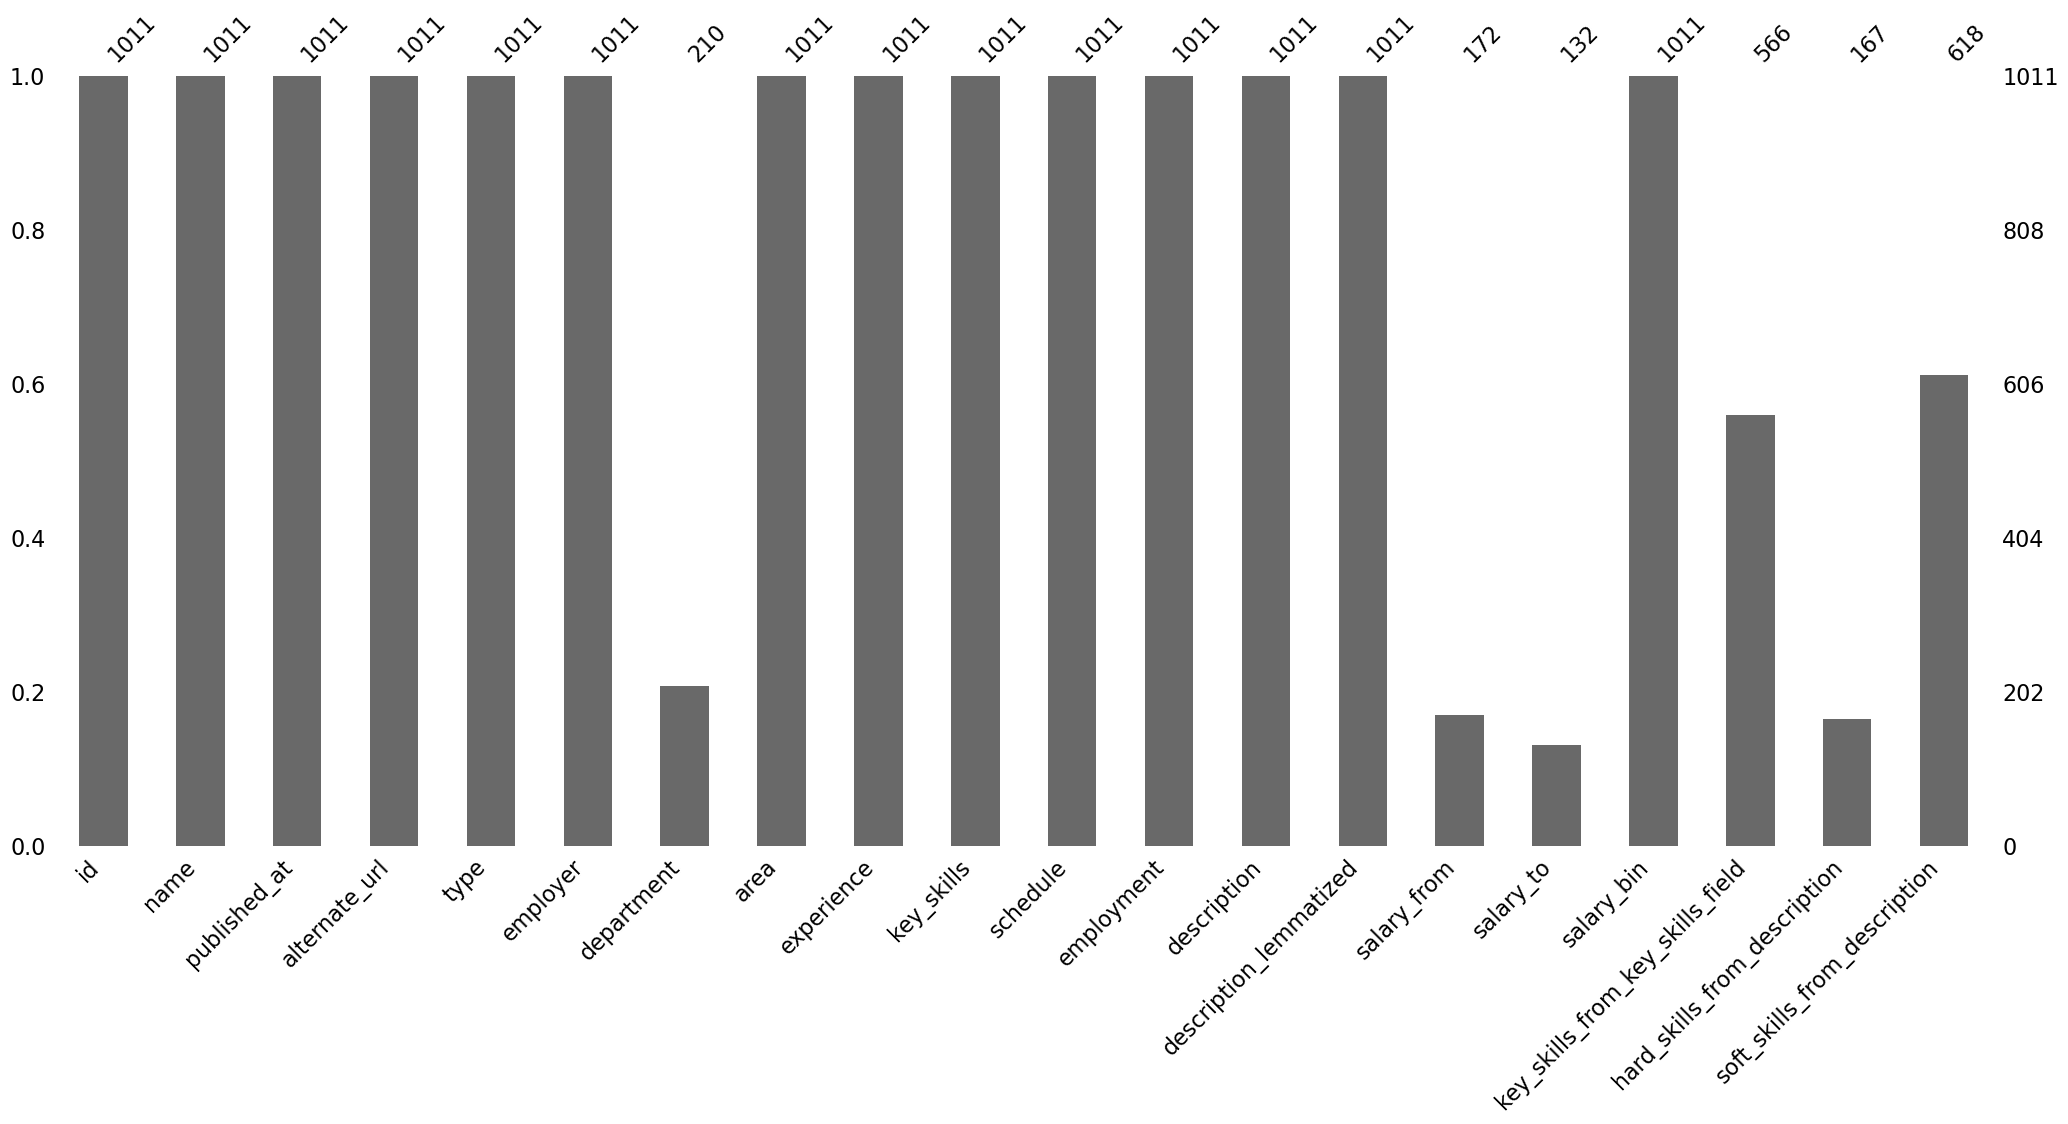

In [12]:
print('Визуализация пропусков по столбцам:')
msno.bar(data_ba);

Матрица корелляции пропусков


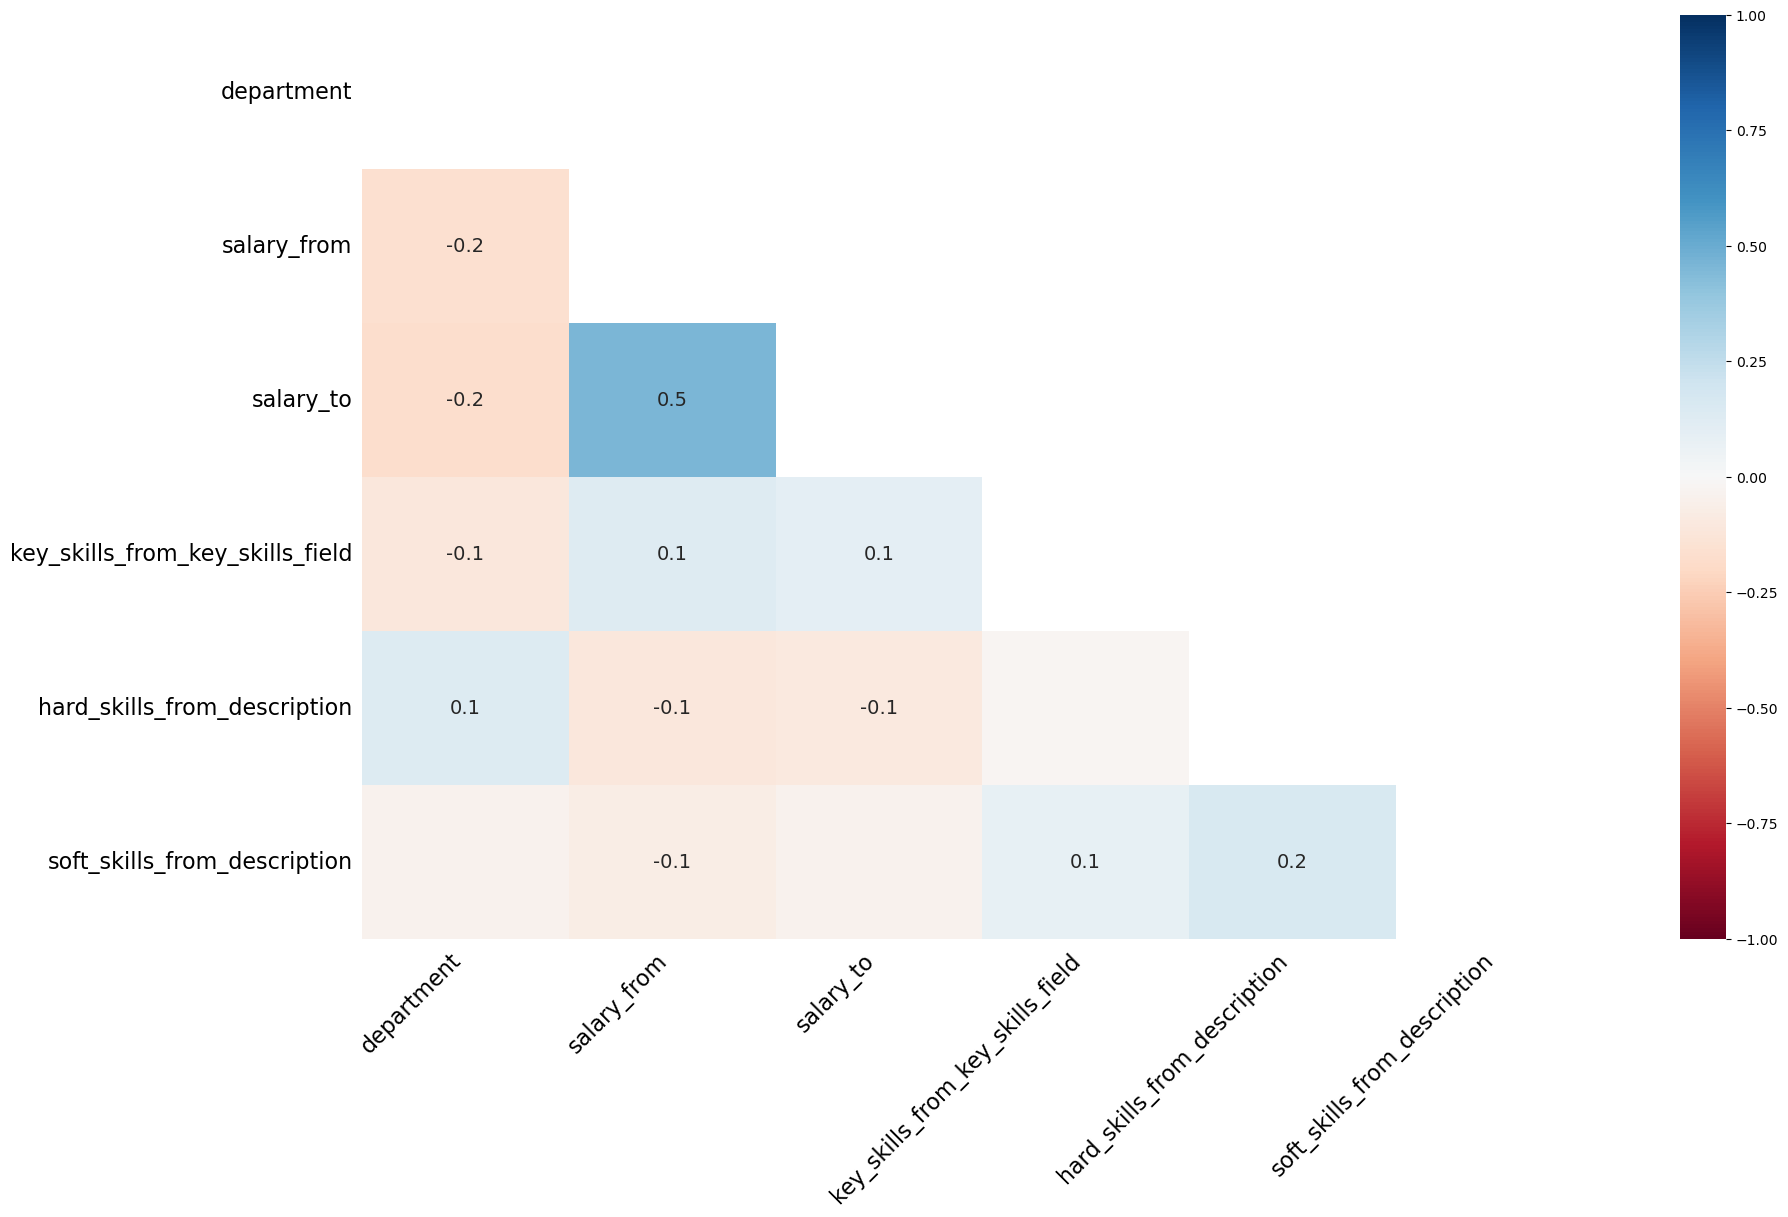

In [13]:
print('Матрица корелляции пропусков')
msno.heatmap(data_ba);

Таким образом, пропуски в разных столбцах не связаны между собой и пропущенные значения независимы, за исключением,
salary_to  и salary_from, что соответствует логике

В данных нет дубликатов, при этом в некоторых столбцах довольно много пропущенных значений. Заполнять их чем-то не имеет 
смысла, поскольку это может нарушать некоторую логику в данной конкретной задаче и данные будут неправильно интерпретированы

Теперь выведем основную информацию датасета вакансий аналитиков данных

In [14]:
data_info(data_da)

Случайные 5 строк в датафрейме:


id                                               name  \
305  95425192             Системный аналитик (Трайб Data Office)   
150  94710847                                    Аналитик данных   
282  95222336  Бизнес-аналитик со знанием SQL (удаленно)/Data...   
196  94935621                                    Аналитик данных   
175  94818662                                    Аналитик данных   

           published_at                   alternate_url      type  \
305 2024-03-25 11:22:00  https://hh.ru/vacancy/95425192  Открытая   
150 2024-03-13 17:50:17  https://hh.ru/vacancy/94710847  Открытая   
282 2024-03-21 16:25:57  https://hh.ru/vacancy/95222336  Открытая   
196 2024-03-18 11:23:59  https://hh.ru/vacancy/94935621  Открытая   
175 2024-03-15 12:08:59  https://hh.ru/vacancy/94818662  Открытая   

                            employer department           area  \
305   АО «ОТП Банк» (JSC «OTP Bank»)        NaN         Москва   
150                         GrowFood        NaN         Москва   
282                              ПКБ        NaN         Липецк   
196  Горно-металлургический комплекс        NaN  Верхняя Пышма   
175                            Комус        NaN         Москва   

              experience                                         key_skills  \
305   Middle (3-6 years)  ['MDM', 'XML/JSON', 'Atlassian Confluence', 'c...   
150   Middle (3-6 years)  ['Git', 'SQL', 'Математическая статистика', 'P...   
282  Junior+ (1-3 years)  ['SQL', 'Работа в команде', 'Планирование карь...   
196  Junior+ (1-3 years)                         ['Аналитическое мышление']   
175  Junior+ (1-3 years)  ['SQL', 'Data Science', 'Pandas', 'Анализ данн...   

             schedule        employment  \
305     Гибкий график  Полная занятость   
150       Полный день  Полная занятость   
282  Удаленная работа  Полная занятость   
196       Полный день  Полная занятость   
175       Полный день  Полная занятость   

                                           description  \
305  отп банк – это банк с понятной философией. у б...   
150  раньше нужно было ходить в магазин, тратить ча...   
282  пкб — технологичная клиентоориентированная ком...   
196  в группу компаний угмк-телеком приглашаем на р...   
175  сегодня комус один из крупнейших поставщиков о...   

                                description_lemmatized  salary_from  \
305  отп банк банк понятный философия банк миссия с...          NaN   
150  рано нужно ходить магазин тратить часы свободн...          NaN   
282  пкб технологичный клиентоориентированный компа...          NaN   
196  группа компания угмк телеком приглашать работа...      50000.0   
175  сегодня комус крупный поставщик офисный товар ...          NaN   

     salary_to     salary_bin  \
305        NaN  ЗП не указана   
150        NaN  ЗП не указана   
282        NaN  ЗП не указана   
196        NaN  ЗП не указана   
175        NaN  ЗП не указана   

                      key_skills_from_key_skills_field  \
305  REST, SOAP, CRM, MDM, Atlassian Jira, Atlassia...   
150  SQL, Python, Аналитические исследования, Git, ...   
282  Работа в команде, SQL, Умение работать в колле...   
196                                                NaN   
175           SQL, Python, Анализ данных, Data Science   

    hard_skills_from_description soft_skills_from_description  
305                   confluence                 Документация  
150                       Pandas                          NaN  
282                          NaN                          NaN  
196                          NaN       Аналитическое мышление  
175                       Pandas                          NaN

Основная информация df.info():
_______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   alternate_url                     417 non-null    object        
 4   type                              417 non-null    object        
 5   employer                          417 non-null    object        
 6   department                        137 non-null    object        
 7   area                              417 non-null    object        
 8   experience                        417 non-null    object        
 9   key_skills       

Количество пропущенных значений  \
id                                                              0   
name                                                            0   
published_at                                                    0   
alternate_url                                                   0   
type                                                            0   
employer                                                        0   
department                                                    280   
area                                                            0   
experience                                                      0   
key_skills                                                      0   
schedule                                                        0   
employment                                                      0   
description                                                     0   
description_lemmatized                                          0   
salary_from                                                   360   
salary_to                                                     387   
salary_bin                                                      0   
key_skills_from_key_skills_field                              180   
hard_skills_from_description                                  326   
soft_skills_from_description                                  282   

                                  % пропущенных значений  
id                                                  0.00  
name                                                0.00  
published_at                                        0.00  
alternate_url                                       0.00  
type                                                0.00  
employer                                            0.00  
department                                         67.15  
area                                                0.00  
experience                                          0.00  
key_skills                                          0.00  
schedule                                            0.00  
employment                                          0.00  
description                                         0.00  
description_lemmatized                              0.00  
salary_from                                        86.33  
salary_to                                          92.81  
salary_bin                                          0.00  
key_skills_from_key_skills_field                   43.17  
hard_skills_from_description                       78.18  
soft_skills_from_description                       67.63

Количество дубликатов: 0


Визуализация целостности данных:


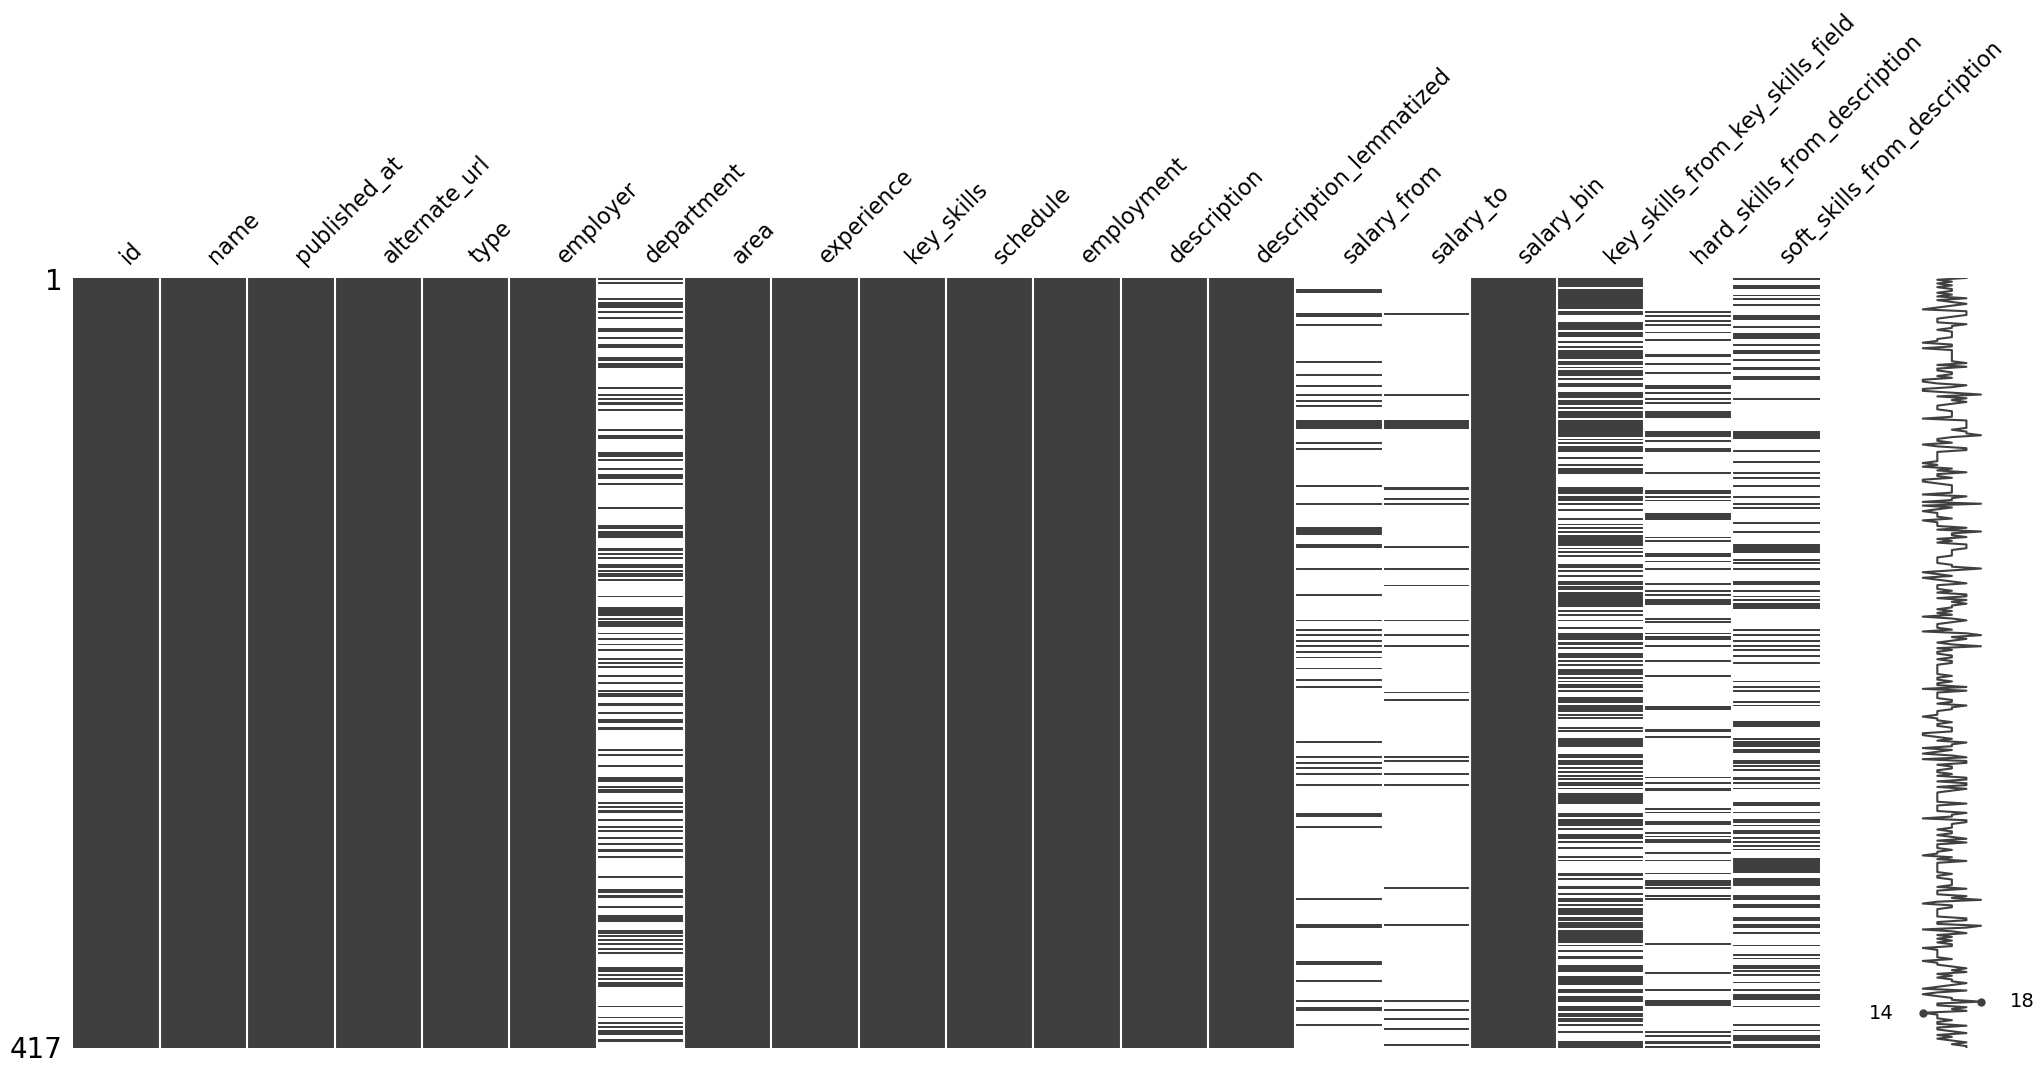

In [15]:
print('Визуализация целостности данных:')
msno.matrix(data_da);

Визуализация пропусков по столбцам:


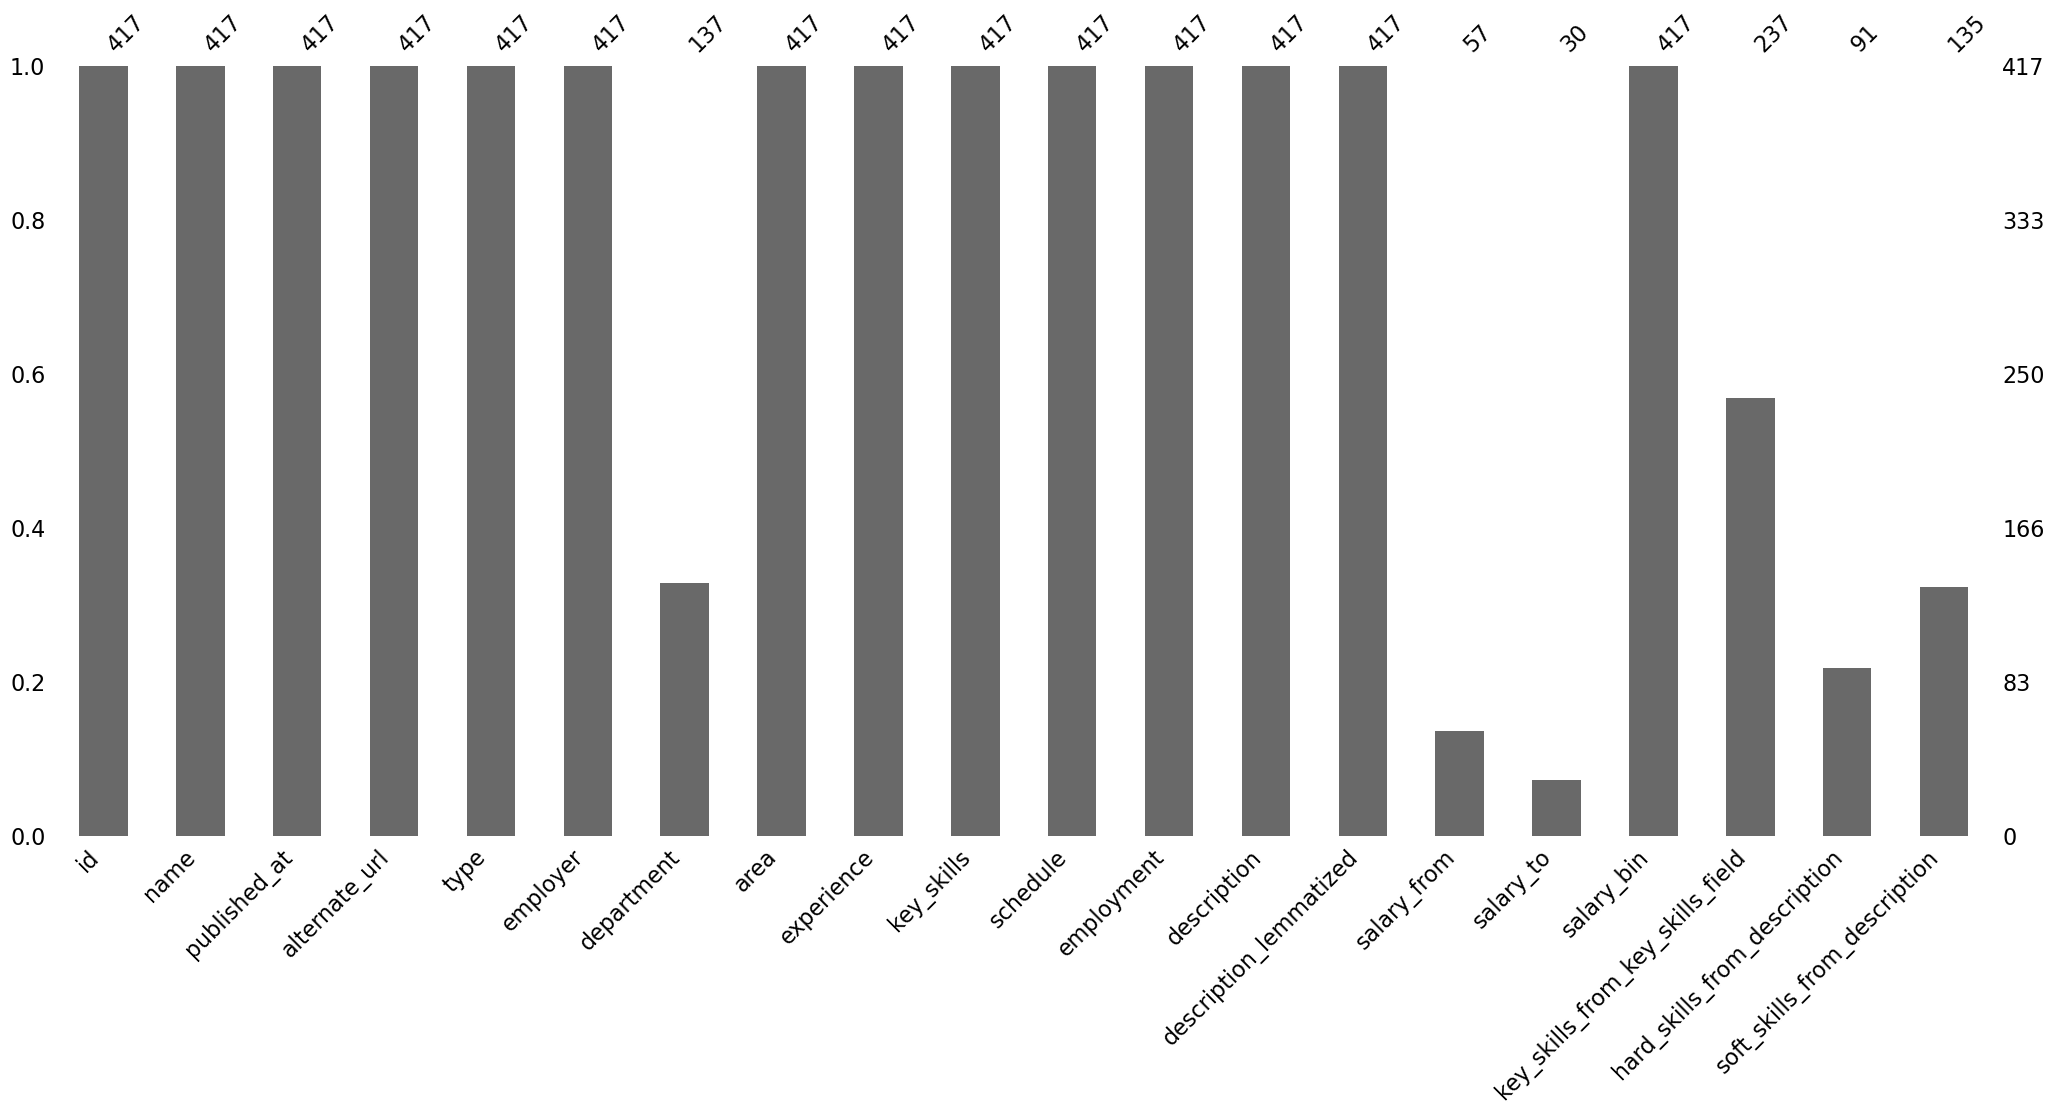

In [16]:
print('Визуализация пропусков по столбцам:')
msno.bar(data_da);

Матрица корелляции пропусков


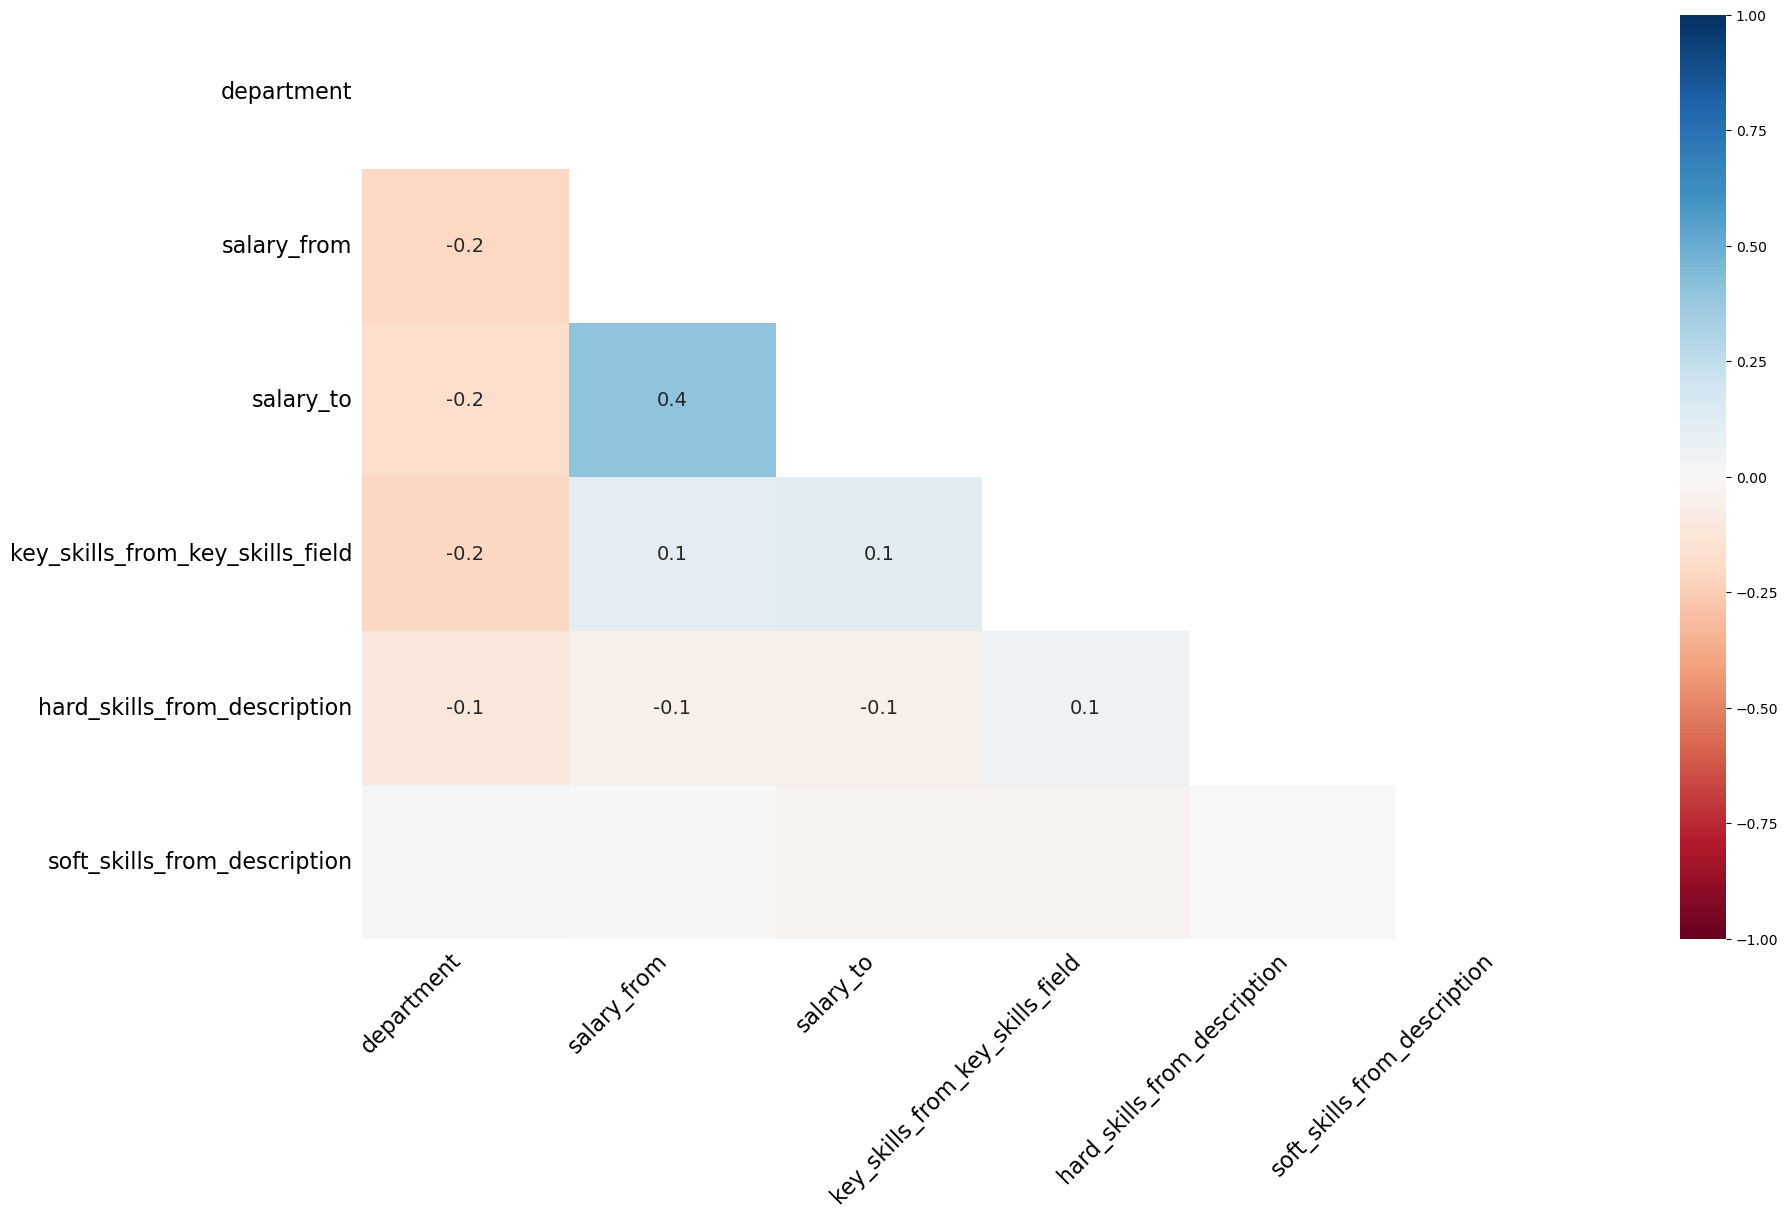

In [17]:
print('Матрица корелляции пропусков')
msno.heatmap(data_da);

В данном случае возникает такая же ситуация, как и с прошлым датасетом

В данных присутствуют "лишние" вакансии. Так, например, среди бизнес-аналитиков присутствуют вакансии системного аналитика,
data engineer и т.д. А среди вакансий аналитиков данных встречаются бизнес-аналитики, системные аналитики и т.д. Таким образом,
для отбора нужных вакансий составим "мешок" слов, включающий в себя все возможные обозначения аналитиков данных и
бизнес-аналитиков. А далее, с использованием строковых методов, на основе регулярных выражений найдем все подходящие вакансии, в которых
встречаются составленный подстроки и ключевые слова.


In [18]:
data_ba['name']=data_ba['name'].str.lower()

In [19]:
data_ba['name'].unique()

array(['бизнес-аналитик',
       'бизнес-аналитик / системный аналитик (продуктовая ит-компания, bpm-система, удаленно)',
       'бизнес-аналитик 1с',
       'бизнес-аналитик лис (лабораторной информационной системы)',
       'аналитик бизнес-процессов',
       'бизнес-аналитик (мобильное приложение)',
       'бизнес-аналитик кредитного процесса', 'бизнес-аналитик (middle)',
       'бизнес-аналитик (операционный департамент)',
       'ведущий бизнес-аналитик',
       'системный аналитик/бизнес-аналитик (поточное производство)',
       'бизнес-аналитик по цифровым продуктам',
       'бизнес-аналитик / продуктовый аналитик (в продуктовую ит-компанию)',
       'ведущий бизнес-аналитик (ит компания)',
       'ведущий менеджер по автоматизации бизнес процессов (бизнес-аналитик)',
       'бизнес-аналитик стрима "онбординг"',
       'финансовый аналитик отдела бизнес планирования управленческой отчетности',
       'бизнес/системный аналитик 1с:erp',
       'аналитик оптимизации бизнес-процесс

In [20]:
ba_key_names=['бизнес-аналитик','аналитик бизнес-процессов','бизнес- аналитик','аналитик бизнес процессов'
  ,'бизнес/системный аналитик','аналитик (бизнес-процессы)'
,'аналитика корпоративного бизнеса','бизнес/системный аналитик','бизнес аналитик',
 'аналитик (бизнес/системный)','бизнес - аналитик','business analyst','business planning analyst',
 'бизнес / системный аналитик'
 ]

In [21]:
data_da['name']=data_da['name'].str.lower()

In [22]:
data_da['name'].unique()

array(['управляющий эксперт по аналитике данных',
       'системный аналитик (взаимодействие между абонентами сети передачи данных самолета мс-21)',
       'аналитик данных в группу управления метаданными [governance]',
       'data-аналитик', 'аналитик данных (bi)',
       'аналитик данных bi отдела автоматизации (гибридный график работы)',
       'junior data engineer/ bi аналитик (дашборды)', 'аналитик данных',
       'data analyst', 'аналитик данных (digital маркетинг)',
       'ведущий дата аналитик',
       'аналитик данных / дата аналитик / data analyst (анти-фрод)',
       'аналитик данных / data analyst',
       'младший аналитик данных (ozon снг)',
       'главный аналитик данных (дата аналитик / data analyst)',
       'аналитик данных (телеком)',
       'руководитель направления (клиентская аналитика и монетизация данных)',
       'senior frontend developer на продукт мтс аналитика (big data)',
       'аналитик данных sql', 'младший аналитик данных',
       'аналитик/разрабо

Аналогично сделаем и для вакансий аналитиков данных

In [23]:
da_key_names=['аналитик данных','data-аналитик','data analyst','дата аналитик',
 'дата-аналитик','data аналитик','специалист-аналитик данных',
 'аналитике и визуализации данных','специалист по анализу данных',
 'специалист по обработке данных / аналитик','руководитель отдела аналитики данных'
 ,'data - аналитик','аналитик внешних данных','руководитель data',
 'data scientist/analyst','аналитик клиентских данных','аналитик больших данных','аналитике данных','аналитик big data','дата аналитики',
   'data/product analyst','данных (аналитика и отчетность)','аналитики данных','аналитик data'   
 ]

In [24]:
data_ba=data_ba[data_ba['name'].str.contains('|'.join(ba_key_names))]

C:\Users\Acer\AppData\Local\Temp\ipykernel_28880\4007139377.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_ba=data_ba[data_ba['name'].str.contains('|'.join(ba_key_names))]


In [25]:
print(f'После фильтрации осталось {round(data_ba.shape[0]/ba_shape*100,2)}% данных о вакансиях бизнес-аналитиков')

После фильтрации осталось 93.97% данных о вакансиях бизнес-аналитиков


In [26]:
data_da=data_da[data_da['name'].str.contains('|'.join(da_key_names))]

C:\Users\Acer\AppData\Local\Temp\ipykernel_28880\3288507072.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_da=data_da[data_da['name'].str.contains('|'.join(da_key_names))]


In [27]:
print(f'После фильтрации осталось {round(data_da.shape[0]/da_shape*100,2)}% данных о вакансиях аналитиков данных')

После фильтрации осталось 81.06% данных о вакансиях аналитиков данных


Таким образом, оставили только вакансии, относящиеся к бизнес-аналитикам и аналитикам данных, а не просто вакансии, 
которые как-то косвенно были с ними связаны

In [28]:
import re

Посмотрим, какое количество вакансий представлено для каждого грейда в датасете

In [29]:
ex=data_da['experience'].value_counts().reset_index()
ex

experience  count
0    Junior+ (1-3 years)    200
1     Middle (3-6 years)    113
2  Junior (no experince)     24
3      Senior (6+ years)      1

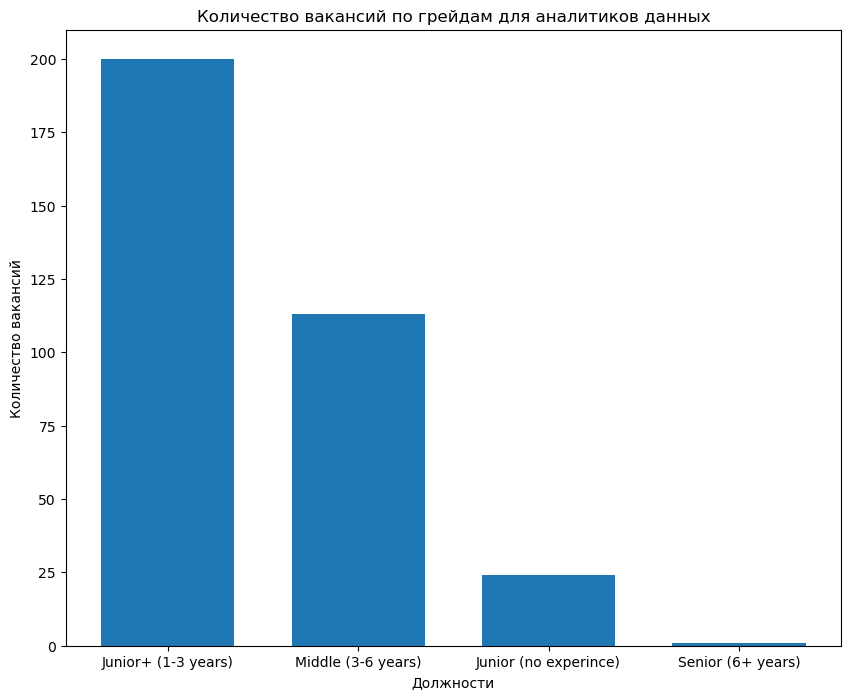

In [30]:
plt.figure(figsize=(10,8));
plt.bar(ex['experience'],ex['count'],width=0.7);
plt.xlabel('Должности');
plt.ylabel('Количество вакансий');
plt.title('Количество вакансий по грейдам для аналитиков данных');

У аналитиков данных больше всего junior+ и middle. При этом senior практически нет, таким образом для данного грейда
выборка не является репрезентативной и нельзя сделать довольно точный анализ для senior на основе имеющихся данных

Теперь посмотрим на распределение вакансий у бизнес-аналитиков

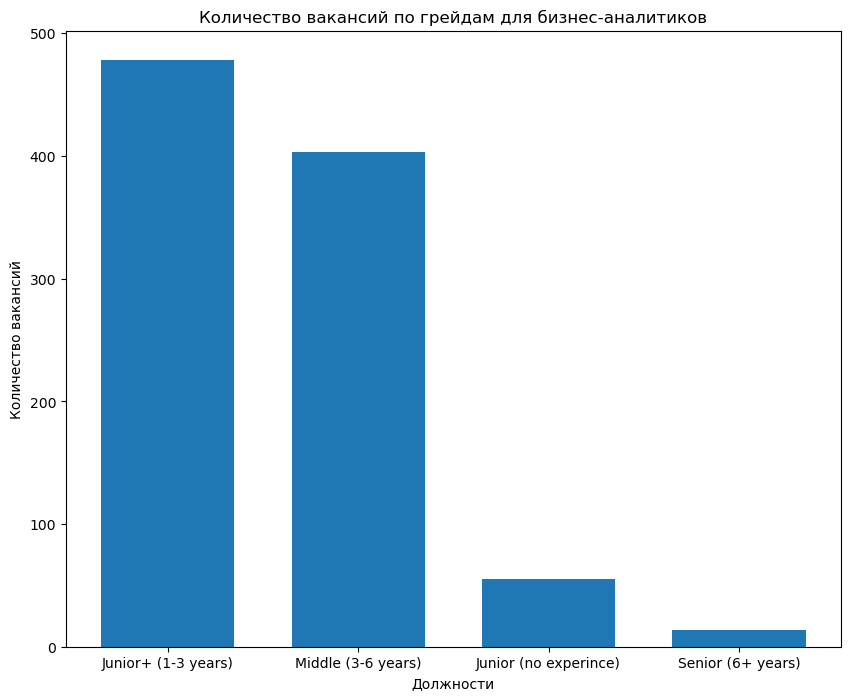

In [31]:
ex2=data_ba['experience'].value_counts().reset_index()
plt.figure(figsize=(10,8));
plt.bar(ex2['experience'],ex2['count'],width=0.7);
plt.xlabel('Должности');
plt.ylabel('Количество вакансий');
plt.title('Количество вакансий по грейдам для бизнес-аналитиков');

В данном случае наблюдается похожая ситуация, вакансий senior больше, при этом анализ данного грейда может дать не самый
корректный результат

In [32]:
cat_cols=['type','experience','schedule','salary_bin'] 

Теперь визуализируем основные категориальные признаки для бизнес-аналитиков

Тип работы, опыт, график работы, зарплатная вилка для бизнес-аналитиков


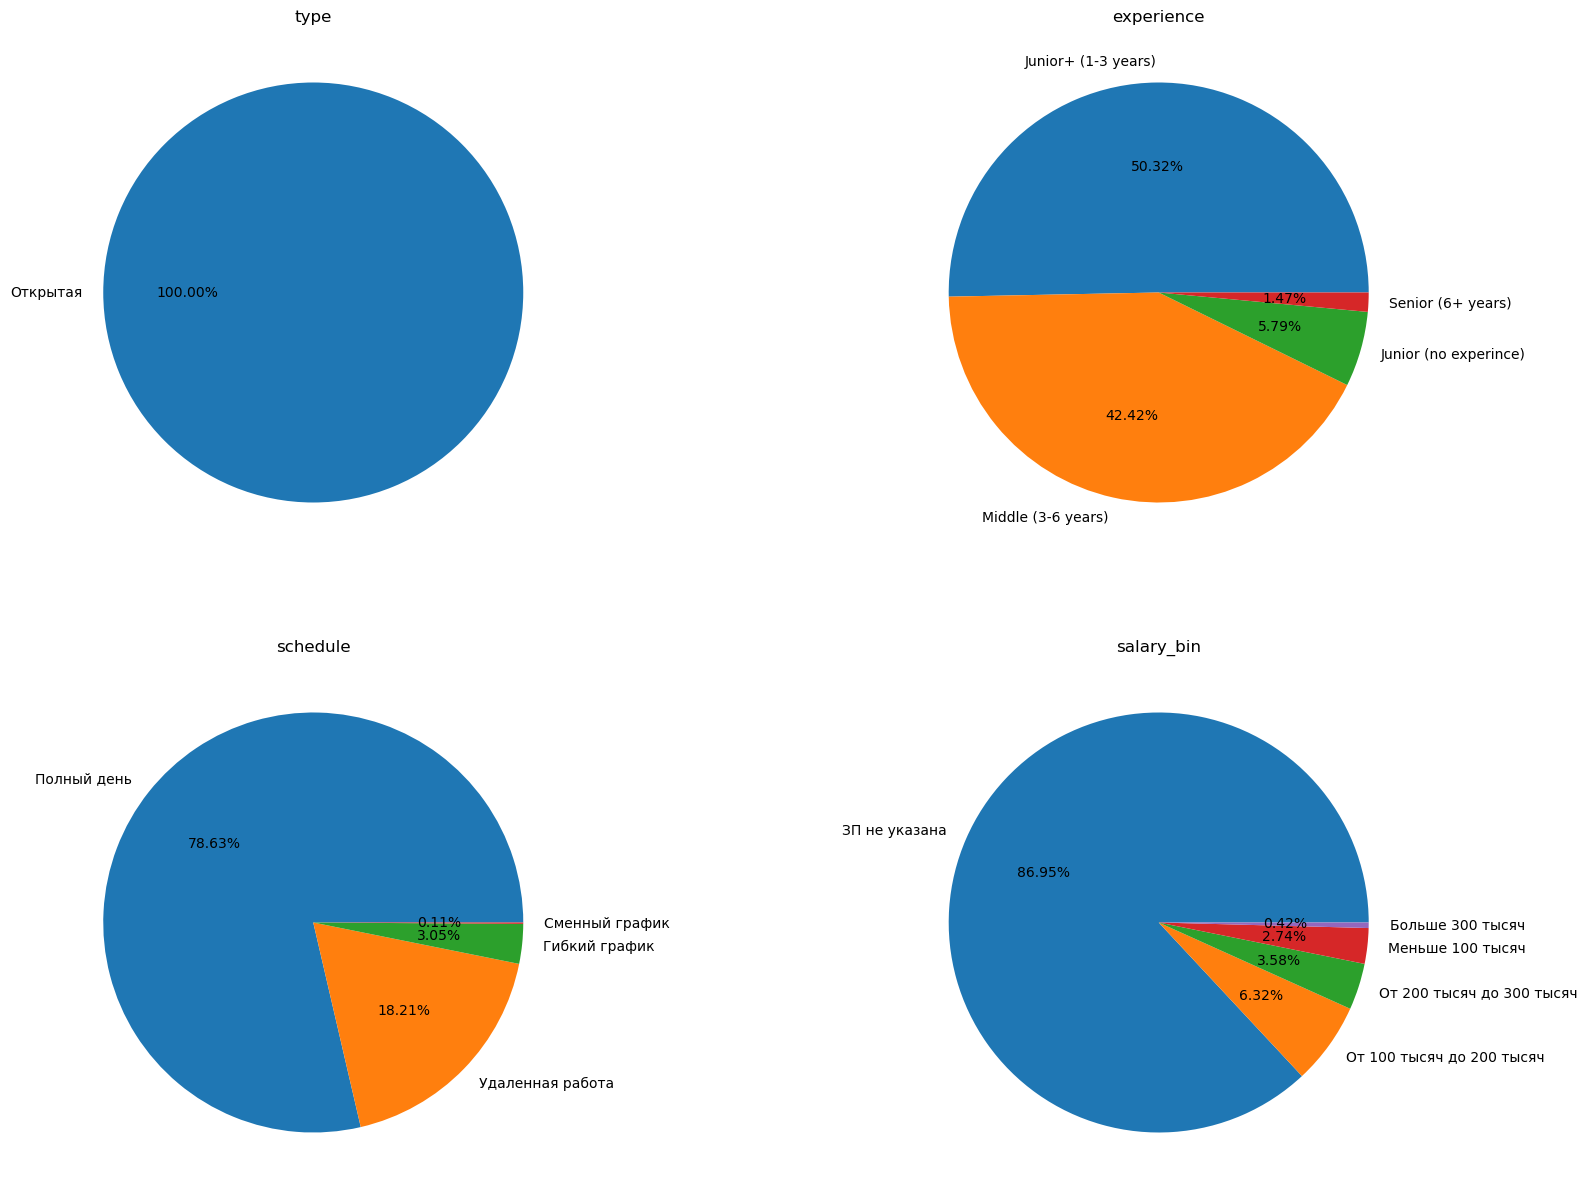

In [33]:
print('Тип работы, опыт, график работы, зарплатная вилка для бизнес-аналитиков')
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
for ax,col in zip(axes.flatten(),cat_cols):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(data_ba[col].value_counts(),autopct="%.2f%%",labels=data_ba[col].value_counts().index)


Большинству компаний требуются сотрудники, готовые работать полный рабочий день, и в бльшинстве вакансий зарплатные вилки 
не указаны

Теперь проанализируем зарплаты аналитиков данных  и бизнес аналитиков, проверим гипотезу о равенстве средних
 зарплат аналитиков данных и бизнес аналитиков в генеральной совокупности, $\alpha=0.05 $: 
              $H_{0}:\mu_{0}=\mu_{1};$
              $H_{1}:\mu_{0}\neq\mu_{1}.$
            
        
        

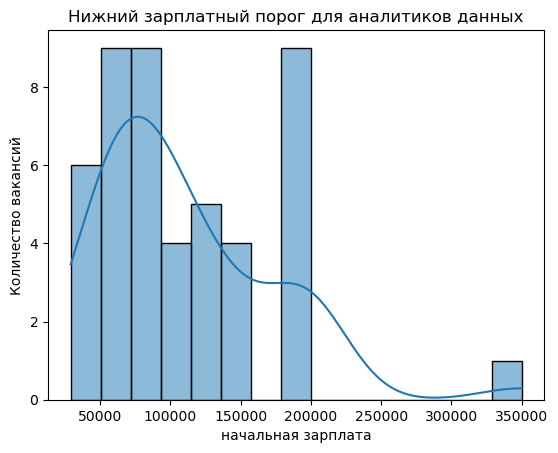

In [34]:

sns.histplot(data_da['salary_from'],kde=True,bins=15);
plt.xlabel('начальная зарплата');
plt.ylabel('Количество вакансий');
plt.title('Нижний зарплатный порог для аналитиков данных');


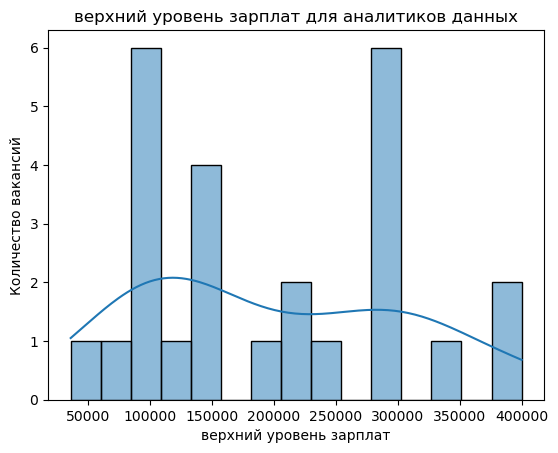

In [35]:
sns.histplot(data_da['salary_to'],kde=True,bins=15);
plt.xlabel('верхний уровень зарплат');
plt.ylabel('Количество вакансий');
plt.title('верхний уровень зарплат для аналитиков данных');

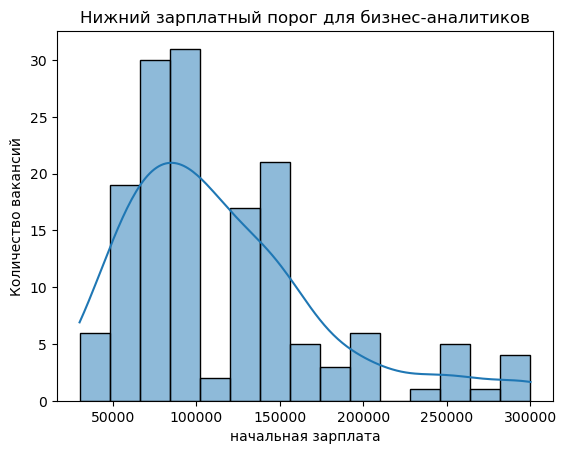

In [36]:
sns.histplot(data_ba['salary_from'],kde=True,bins=15);
plt.xlabel('начальная зарплата');
plt.ylabel('Количество вакансий');
plt.title('Нижний зарплатный порог для бизнес-аналитиков');#можно совместить или лучше оформить, исп kde 

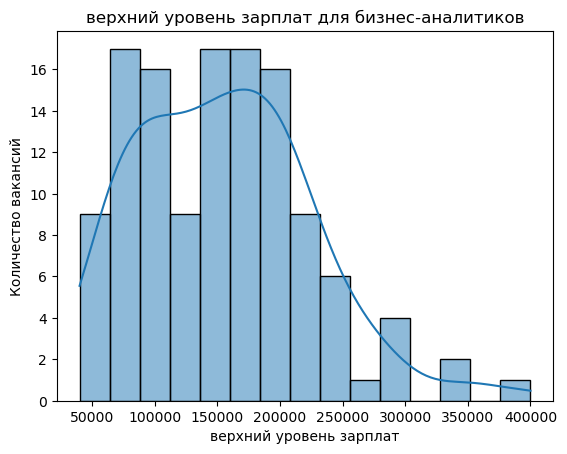

In [37]:

sns.histplot(data_ba['salary_to'],kde=True,bins=15) 
plt.xlabel('верхний уровень зарплат');
plt.ylabel('Количество вакансий');
plt.title('верхний уровень зарплат для бизнес-аналитиков');

Исследуем основные числовые характеристики

In [38]:
data_da['id']=data_da['id'].astype(object)
data_da.describe()

published_at    salary_from      salary_to
count                            338      47.000000      26.000000
mean   2024-03-22 18:27:49.056212992  111500.744681  201145.000000
min              2024-03-12 21:40:27   28940.000000   36175.000000
25%       2024-03-18 16:14:24.500000   70000.000000  100000.000000
50%              2024-03-22 13:47:28   90000.000000  175000.000000
75%    2024-03-27 08:59:18.750000128  143500.000000  300000.000000
max              2024-03-31 22:20:48  350000.000000  400000.000000
std                              NaN   63328.721951  107789.934317

In [39]:
data_ba['id']=data_ba['id'].astype(object)
data_ba.describe()

published_at    salary_from      salary_to
count                            950     151.000000     124.000000
mean   2024-03-22 15:36:26.173684224  115499.781457  155806.532258
min              2024-03-12 23:44:07   30000.000000   40000.000000
25%              2024-03-18 14:54:08   70000.000000  100000.000000
50%              2024-03-22 11:30:53  100000.000000  150000.000000
75%    2024-03-27 10:44:25.750000128  150000.000000  200000.000000
max              2024-03-31 18:20:38  300000.000000  400000.000000
std                              NaN   59732.947207   69861.787455

Рассмотрим столбец salary_from, поскольку для него данных больше и они больше удовлетворяют нормальности распределения

import scipy.stats as stats

stats.ttest_ind(data_da['salary_from'].dropna().to_numpy(), data_ba['salary_from'].dropna().to_numpy(), equal_var=True)
#std близки, поставим true в equal_var

Так как pvalue>$\alpha$, не отклоняем $H_{0}$

Теперь используем ранговый Манна-Уитни, поскольку распределения близки к нормальному распределению, но не являются им. Также
 в соответствиии с критерием близки значения дисперсии

In [41]:
stat,p=stats.mannwhitneyu(data_da['salary_from'].dropna().to_numpy(), data_ba['salary_from'].dropna().to_numpy())
print(f'U-stat: {stat}, p-value: {p}')

U-stat: 3313.5, p-value: 0.49286420577362533


Аналогично не можем сделать вывод о неравенстве средних зарплат в генеральной совокупности

Теперь визуализируем основные категориальные признаки для аналитиков данных

Тип работы, опыт, график работы, зарплатная вилка для аналитиков данных


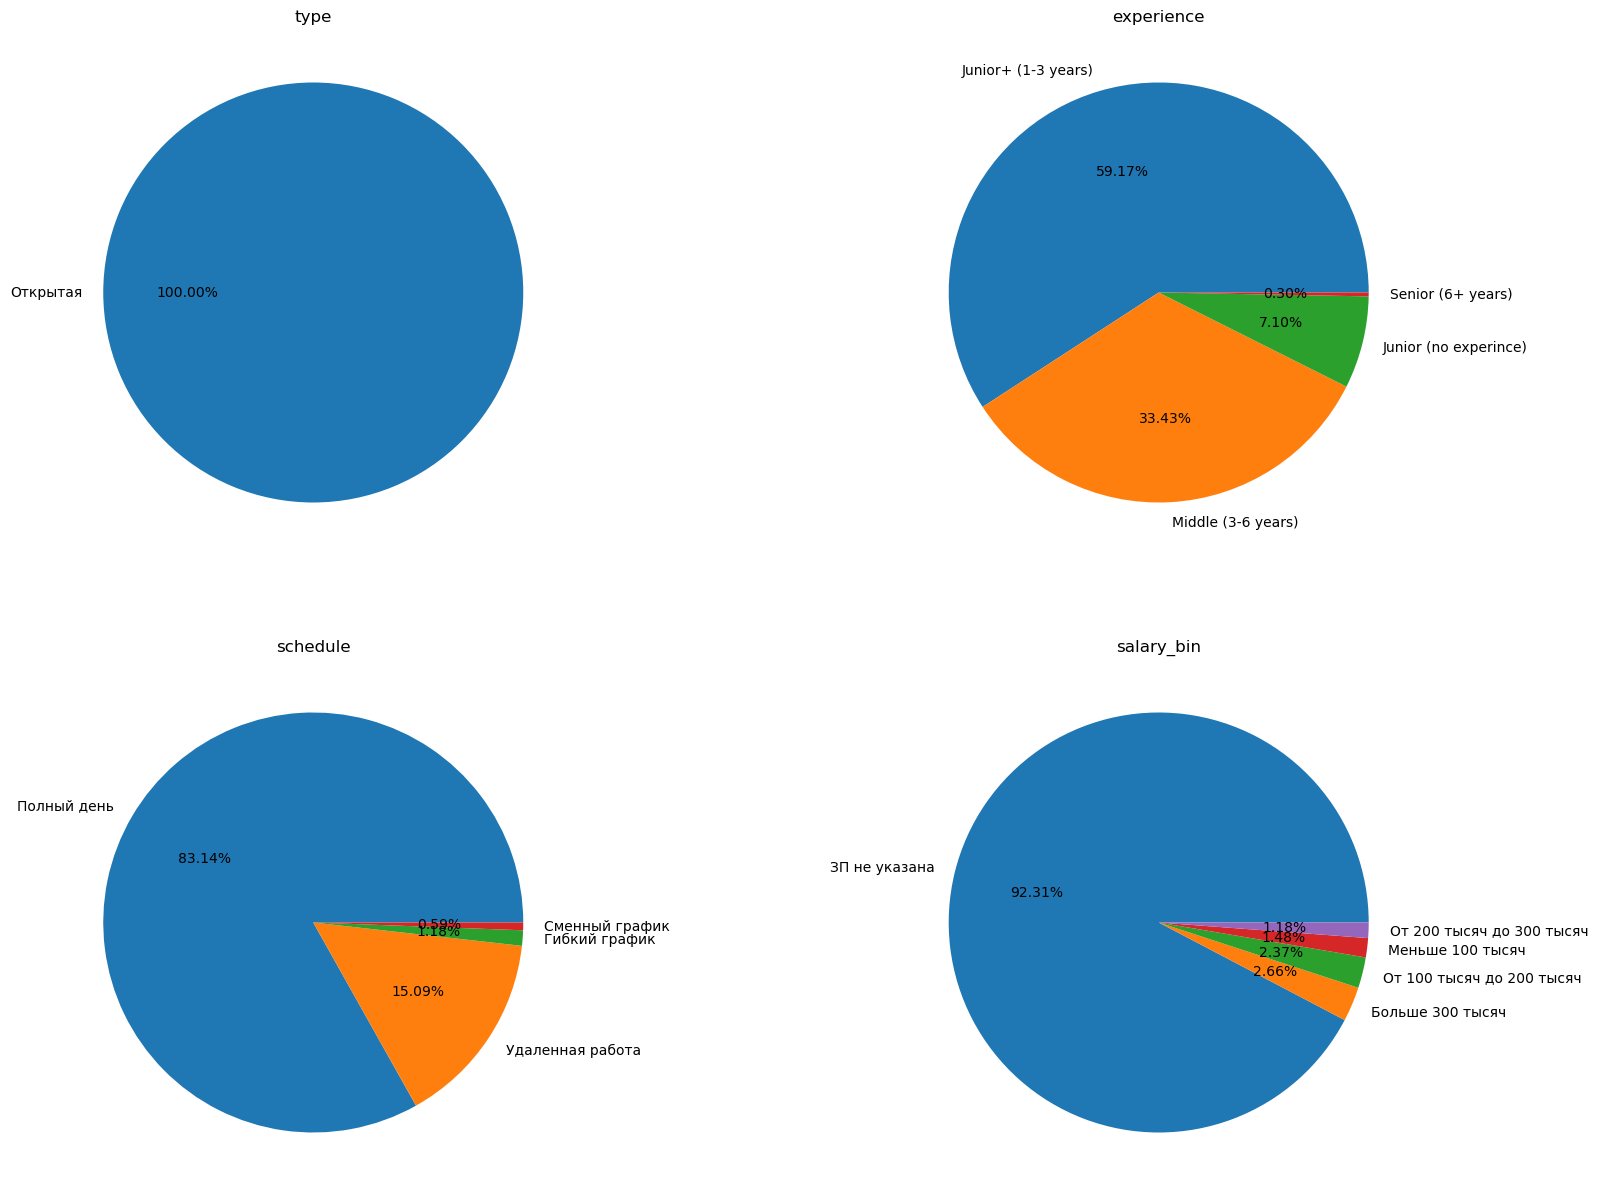

In [42]:
print('Тип работы, опыт, график работы, зарплатная вилка для аналитиков данных')
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
for ax,col in zip(axes.flatten(),cat_cols):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(data_da[col].value_counts(),autopct="%.2f%%",labels=data_da[col].value_counts().index)

Для аналитиков данных ситуация анологична, можно только отметить, что в несколько раз больше доля вакансий, 
где указана зарплата выше 300 тысяч, при этом доля очень маленькая, что влияет на точность анализа. В остальном 
требования по условиям работы похожи

In [43]:

!pip install phik

Теперь построим корелляционную матрицу признаков в том числе и для категориальных данных. Для этого используем 
библиотеку phik, подсчет базируется на хи-квадрат статистике и дальнейшим преобразованиям, в результате 
которых получаем значения из интервала [0,1]. В данном случае нет направления зависимости, но чем ближе к 1 - тем больше
присутствует зависимость

In [44]:
import phik
phik_corr_da=data_da[['area','experience','schedule','employment','salary_from']].phik_matrix();

interval columns not set, guessing: ['salary_from']


In [45]:
print('корелляционная матрица для аналитиков данных')
px.imshow(phik_corr_da,text_auto=True,width=600,height=600)

корелляционная матрица для аналитиков данных


В данном случае нет явных зависимостей за исключениям зависимости начальной зарплата относительно грейда(опыта), что 
соответствует логике

In [46]:
phik_corr_ba=data_ba[['salary_from','employment','schedule','experience']].phik_matrix();

interval columns not set, guessing: ['salary_from']


In [47]:
print('корелляционная матрица для аналитиков данных')
px.imshow(phik_corr_ba,text_auto=True,width=600,height=600)

корелляционная матрица для аналитиков данных


Для бизнес-аналитиков получаем похожий результат

In [48]:
from itertools import chain

In [55]:
def topskills(skill_list):
    d=pd.Series(skill_list)
    d=pd.DataFrame(d)
    d.columns=['skills']
    d=d.drop(labels=d.loc[d['skills']==''].index)#
    dda_top_skills=d['skills'].value_counts().reset_index()
    dda_top_skills=dda_top_skills.dropna()
    dda_top_skills=dda_top_skills.loc[dda_top_skills['skills']!='nan']#
    
    return dda_top_skills

Создадим функции для извлечения ключевых навыков без повторений, чтобы определить эти навыки и с поторами, то есть 
собираем их из каждого объявления, чтобы потом понять, какие навыки требуются чаще, для более полного анализа 
 после извлечения данных приведем все к нижнему регистру

In [60]:
def skilllist(data,column_name):
    '''Функция подходит для извлечения всех ключевых навыков из столбцов
     key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description в виде
     списка всех перечисленных навыков, без дубликатов'''
    data[column_name]=data[column_name].astype(str)

    only_soft_da=data[column_name].to_list()
    only_soft_da=[only_soft_da[i].split(',') for i in range(len(only_soft_da))]
    only_soft_da=list(chain.from_iterable(only_soft_da))
    only_soft_da=list(map(lambda x:x.strip(' ').lower(),only_soft_da))
    only_soft_da=list(set(only_soft_da)-{'nan'})
    return only_soft_da

In [61]:
def skilllistcount(data,column_name):
    '''Функция подходит для извлечения всех ключевых навыков из столбцов
     key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description в виде
     списка всех перечисленных навыков с помвторениями'''
    data[column_name]=data[column_name].astype(str)

    only_soft_da=data[column_name].to_list()
    only_soft_da=[only_soft_da[i].split(',') for i in range(len(only_soft_da))]
    only_soft_da=list(chain.from_iterable(only_soft_da))
    only_soft_da=list(map(lambda x:x.strip(' ').lower(),only_soft_da))
    
    return only_soft_da

Вычленим мягкие навыки из датасета

In [62]:

softda=skilllist(data_da,'soft_skills_from_description')
softba=skilllist(data_ba,'soft_skills_from_description')

Создадим список, включим в него ключевые навыки из вакансий, а также список список навыков из интернета

In [63]:
soft_skills_list = ["коммуникабельность","умение работать в команде","эмоциональный интеллект","креативность",
    "способность к саморазвитию","гибкость мышления","ответственность за результат своей работы",
    "умение принимать решения в условиях неопределенности","стрессоустойчивость","оптимизм и позитивный настрой на жизнь",
                    'работа с большим объемом информации','работа в команде','аналитический склад ума','инициативность',
   'пунктуальность', 'критическое мышление', 'адаптивность','тайм-менеджмент', 'вежливость','деловая коммуникация', 
                         'деловое общение'              ]

soft_skills=list(set(softba+softda+ soft_skills_list))

In [64]:
soft_skills

['аналитический склад ума',
 'умение принимать решения в условиях неопределенности',
 'деловая коммуникация',
 'эмпатия',
 'деловое общение',
 'коммуникабельность',
 'переговоры',
 'адаптивность',
 'работа в команде',
 'аналитическое мышление',
 'вежливость',
 'эмоциональный интеллект',
 'решение проблем',
 'работа с большим объемом информации',
 'способность к саморазвитию',
 'инициативность',
 'лидерство',
 'принятие решений',
 'оптимизм и позитивный настрой на жизнь',
 'проактивность',
 'умение работать в команде',
 'критическое мышление',
 'ответственность за результат своей работы',
 'тайм-менеджмент',
 'документация',
 'коммуникация',
 'пунктуальность',
 'гибкость мышления',
 'креативность',
 'стрессоустойчивость']

Функция для задания типа навыка

In [65]:
def skilltype(data):
    sk=data['skills']
    
    if sk in soft_skills:
        return 'soft skill'
    else:
        return 'hard skill'

Функция для визуализации ключевых навыков

In [66]:
def topskillsvis(data,text,n):
    data=data.head(n)
    figskill=px.bar(data,x='count',y='skills',orientation='h')
    figskill.update_layout(title=text,xaxis_title='кол-во совпадений в требованиях',yaxis={'categoryorder':'total ascending'},yaxis_title='навыки')

    figskill.show()


Выпишем основные программы, которые можно написать различным способом для более точного анализа.
Например, кто-то пишет excel, а кто-то ms excel. Или в основном пишут в общем виде sql, а где-то указывают один из
диалектов, при этом подразумеваю и  общем виде тоже


In [70]:
topskills(skilllistcount(data_ba,'key_skills_from_key_skills_field')).head(15)

skills  count
1                         бизнес-анализ    292
2                                  bpmn    177
3        моделирование бизнес процессов    111
4                                   sql    108
5                аналитическое мышление    103
6          оптимизация бизнес-процессов     95
7                                   uml     87
8        разработка технических заданий     83
9        постановка задач разработчикам     53
10                     системный анализ     53
11                            аналитика     52
12                        анализ данных     52
13                             ms visio     49
14  работа с большим объемом информации     49
15            анализ бизнес показателей     48

In [71]:
#bpmn,sql,uml,ms visio,jira,confluence

In [72]:
topskills(skilllistcount(data_da,'key_skills_from_key_skills_field')).head(15)

skills  count
1                                   sql    136
2                                python    110
3                         анализ данных     64
4                              power bi     46
5                аналитическое мышление     41
6                              ms excel     40
7   работа с большим объемом информации     36
8                             аналитика     34
9                работа с базами данных     34
10                               ms sql     27
11                              tableau     21
12                        data analysis     20
13             сбор и анализ информации     19
14                          базы данных     17
15                статистический анализ     15

Создадим функцию для поиска подобных объявлений

In [74]:

ba_skill=skilllistcount(data_ba,'key_skills_from_key_skills_field')
def skillsmatch(sklist,skill):
    lst=[]
    for i in set(sklist):
        if skill in i:
            lst.append(i)
    return lst

В качестве примера выведем результат ее работы

In [75]:

skillsmatch(ba_skill,'sql')

['базовые знания sql',
 'ms sql',
 'знание основ sql',
 'pl/sql',
 'pl/pgsql',
 'sql запросы',
 'microsoft sql',
 'mysql',
 'oracle pl/sql',
 'sql',
 'postgresql']

In [76]:
skillsmatch(ba_skill,'bpmn')

['bpmn',
 'bpmn 2.0',
 'нотация bpmn',
 'описание и моделирование бизнес-процессов (bpmn',
 'bpmn 1.2',
 'bpmn2.0']

In [77]:
skillsmatch(ba_skill,'excel')

['excel', 'ms excel', 'уверенный пользователь ms excel', 'пользователь excel']

In [78]:
skillsmatch(ba_skill,'uml')

['подготовка диаграмм последовательностей в uml (use cases)', 'uml)', 'uml']

In [80]:
da_skill=skilllistcount(data_da,'key_skills_from_key_skills_field')

In [81]:
skillsmatch(da_skill,'sql')

['ms sql', 'oracle pl/sql', 'sql', 'ms sql server', 'postgresql', 'pl/sql']

In [82]:
skillsmatch(da_skill,'python')

['библиотеки python', 'python']

In [85]:
skillsmatch(da_skill,'powerpoint')

['ms powerpoint']

In [86]:
len(da_skill)

1406

In [87]:
len(ba_skill)

4037

теперь произведем замену для подобных значений

In [88]:

values_to_replace = ['postgresql', 'ms sql', 'sql запросы', 'mysql', 'знание основ sql', 
                     'oracle pl/sql', 'pl/pgsql', 'microsoft sql', 'pl/sql', 'базовые знания sql', 'sql']
replacement_value = "sql"
ba_same=['sql','bpmn','excel','uml','jira'] 
da_same=['sql','python','excel','tableau','powerpoint']
ba_same_list=[skillsmatch(ba_skill,ba_same[0]),skillsmatch(ba_skill,ba_same[1]),skillsmatch(ba_skill,ba_same[2]),
              skillsmatch(ba_skill,ba_same[3]),skillsmatch(ba_skill,ba_same[4])]
da_same_list=[skillsmatch(da_skill,da_same[0]),skillsmatch(da_skill,da_same[1]),skillsmatch(da_skill,da_same[2]),
              skillsmatch(da_skill,da_same[3]),skillsmatch(da_skill,da_same[4]) ] 

def replace_if_in_list(item, values_to_replace, replacement_value):
    return item if item not in values_to_replace else replacement_value



  

In [89]:
for i in range(len(ba_same)):
    ba_skill=list(map(lambda x: replace_if_in_list(x, ba_same_list[i], ba_same[i]), ba_skill))
    
for i in range(len(ba_same)):
    da_skill=list(map(lambda x: replace_if_in_list(x, da_same_list[i], da_same[i]), da_skill))    

In [90]:
len(ba_skill)

4037

In [91]:
len(da_skill)

1406

Таким образом, теперь данные готовы для более точного анализа

визуализируем сначала информацию для всего датасета

In [92]:

ba_skill=topskills(ba_skill)
ba_skill['skilltype']=ba_skill.apply(skilltype,axis=1)
fig12=px.bar(ba_skill.head(15),x='count',y='skills',orientation='h',color='skilltype',color_discrete_map={'hard skill':'red','soft skill':'blue'})
fig12.update_layout(title='Навыки бизнес-аналитика',xaxis_title='кол-во совпадений в требованиях',yaxis={'categoryorder':'total ascending'},yaxis_title='навыки')
fig12.show()

Напишем функцию для визуализации навыков 

In [93]:
def topskillsvis(data,text,n):
    data=data.head(n)
    figskill=px.bar(data,x='count',y='skills',orientation='h')
    figskill.update_layout(title=text,xaxis_title='кол-во совпадений в требованиях',yaxis={'categoryorder':'total ascending'},yaxis_title='навыки')

    figskill.show()

In [94]:

topskillsvis(ba_skill.query('skilltype=="soft skill"'),'Soft skills  business-analyst',5)

In [95]:
topskillsvis(ba_skill.query('skilltype=="hard skill"'),'Hard skills  business-analyst',10)


К самым распространенным мягким навыкам бизнес аналитика относится аналитическое мышление и умение работать с большим объемом
 информации, тогда как основные hard skills включают в себя бизнес анализ, bpmn и sql. При этом в вакансиях 
    в основном указаны hard skills

Теперь построем то же самое для аналитиков данных


In [96]:
da_skill=topskills(da_skill)
da_skill['skilltype']=da_skill.apply(skilltype,axis=1)
fig13=px.bar(da_skill.head(15),x='count',y='skills',orientation='h',color='skilltype',color_discrete_map={'hard skill':'red','soft skill':'blue'})
fig13.update_layout(title='Навыки аналитика данных',xaxis_title='кол-во совпадений в требованиях',yaxis={'categoryorder':'total ascending'},yaxis_title='навыки')

fig13.show()

In [97]:
topskillsvis(da_skill.query('skilltype=="soft skill"'),'Soft skills  data-analyst',5)


In [98]:
topskillsvis(da_skill.query('skilltype=="hard skill"'),'Hard skills  data-analyst',10)

Для аналитиков данных основные мягкие навыки совпадают, при этом hard skills отличаются. Аналитики данных лучше всего 
должны владеть sql, python и разбираться в методах анализа данных

In [99]:
#!pip install python-Levenshtein

In [100]:
#from Levenshtein import distance as lev

In [101]:

#tabl=da_skill['skills'].value_counts().reset_index()
#tabl
#for i in range(tabl.shape[0]):
#    if lev('excel',tabl['skills'][i])<3:
#        print(tabl['skills'][i])

Разобьем вакансии по грейдам для каждой специализации

In [102]:

data_da_jun=data_da.query('experience=="Junior (no experince)"')
data_da_junplus=data_da.query('experience=="Junior+ (1-3 years)"')
data_da_middle=data_da.query('experience=="Middle (3-6 years)"')
data_da_senior=data_da.query('experience=="Senior (6+ years)"')

In [103]:
data_ba_jun=data_ba.query('experience=="Junior (no experince)"')
data_ba_junplus=data_ba.query('experience=="Junior+ (1-3 years)"')
data_ba_middle=data_ba.query('experience=="Middle (3-6 years)"')
data_ba_senior=data_ba.query('experience=="Senior (6+ years)"')

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
def repl(data):
    data_sk=skilllistcount(data,'key_skills_from_key_skills_field')
    for i in range(len(ba_same)):
        data_sk=list(map(lambda x: replace_if_in_list(x, ba_same_list[i], ba_same[i]), data_sk))
    da_skills=topskills(data_sk)
    return da_skills
    

In [106]:



jun_da_skills=repl(data_da_jun)

jun_da_skills['skilltype']=jun_da_skills.apply(skilltype,axis=1)
topskillsvis(jun_da_skills.query('skilltype=="hard skill"'),'Hard skills junior data-analyst',10)
topskillsvis(jun_da_skills.query('skilltype=="soft skill"'),'Soft skills junior data-analyst',5)

In [107]:

junplus_da_skills=repl(data_da_junplus)

junplus_da_skills['skilltype']=junplus_da_skills.apply(skilltype,axis=1)
topskillsvis(junplus_da_skills.query('skilltype=="hard skill"'),'Hard skills junior+ data-analyst',10)
topskillsvis(junplus_da_skills.query('skilltype=="soft skill"'),'Soft skills junior+ data-analyst',5)

In [108]:

middle_da_skills=repl(data_da_middle)

middle_da_skills['skilltype']=middle_da_skills.apply(skilltype,axis=1)
topskillsvis(middle_da_skills.query('skilltype=="hard skill"'),'Hard skills middle data-analyst',10)
topskillsvis(middle_da_skills.query('skilltype=="soft skill"'),'Soft skills middle data-analyst',5)

Для senior выборка нерепрезентативна

Основные мягкие навыки не сильно меняются в зависимости от грейда. Hard skills в зависимости от грейда тоже меняются 
не сильно, для аналитиков данных всегда в топ-3 остается sql и python, при этом с повышением грейда добавляются 
новые более сложные требования, если, например, для junior важны excel и powerpoint, то middle должен уметь 
все анализировать на python, хорошо знать базы данных и разбираться в математической статистике.

Теперь рассмотрим для бизнес-аналитиков

In [109]:

jun_ba_skills=repl(data_ba_jun)


jun_ba_skills['skilltype']=jun_ba_skills.apply(skilltype,axis=1)
topskillsvis(jun_ba_skills.query('skilltype=="hard skill"'),'Hard skills junior business-analyst',10)
topskillsvis(jun_ba_skills.query('skilltype=="soft skill"'),'Soft skills junior business-analyst',5)

In [110]:

junplus_ba_skills=repl(data_ba_junplus)


junplus_ba_skills['skilltype']=junplus_ba_skills.apply(skilltype,axis=1)
topskillsvis(junplus_ba_skills.query('skilltype=="hard skill"'),'Hard skills junior+ business-analyst',10)
topskillsvis(junplus_ba_skills.query('skilltype=="soft skill"'),'Soft skills junior+ business-analyst',5)

In [111]:


middle_ba_skills=repl(data_ba_middle)

middle_ba_skills['skilltype']=middle_ba_skills.apply(skilltype,axis=1)
topskillsvis(middle_ba_skills.query('skilltype=="hard skill"'),'Hard skills middle business-analyst',10)
topskillsvis(middle_ba_skills.query('skilltype=="soft skill"'),'Soft skills middle business-analyst',5)

In [112]:

senior_ba_skills=repl(data_ba_senior)


senior_ba_skills['skilltype']=senior_ba_skills.apply(skilltype,axis=1)
topskillsvis(senior_ba_skills.query('skilltype=="hard skill"'),'Hard skills senior business-analyst',5)
#topskillsvis(senior_ba_skills.query('skilltype=="soft skill"'),'Soft skills middle business-analyst',5)

Для бизнес аналитиков основными требованиями вне зависимости от грейда являются: bpmn, бизнес-анализ и sql, требования 
    не сильно меняются, при этом с повышением грейда увеличивается количество требований в плане знания различных 
    программных продуктов

Разницы в требованиях  в зависимости от грейда больше у аналитиков данных

Теперь проанализируем зарплаты, основных работодателей и режим работы у аналитиков данных  и бизнес-аналитиков

In [113]:
cat_cols=['type','schedule','salary_bin']

In [114]:
def visual(data):
    
    
    fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,15))
    for ax,col in zip(axes.flatten(),cat_cols):
        
        ax.set_title(col)
        if col in cat_cols:
            ax.pie(data[col].value_counts(),autopct="%.2f%%",labels=data[col].value_counts().index)


Тип работы, график, вилка зарплат для junior da


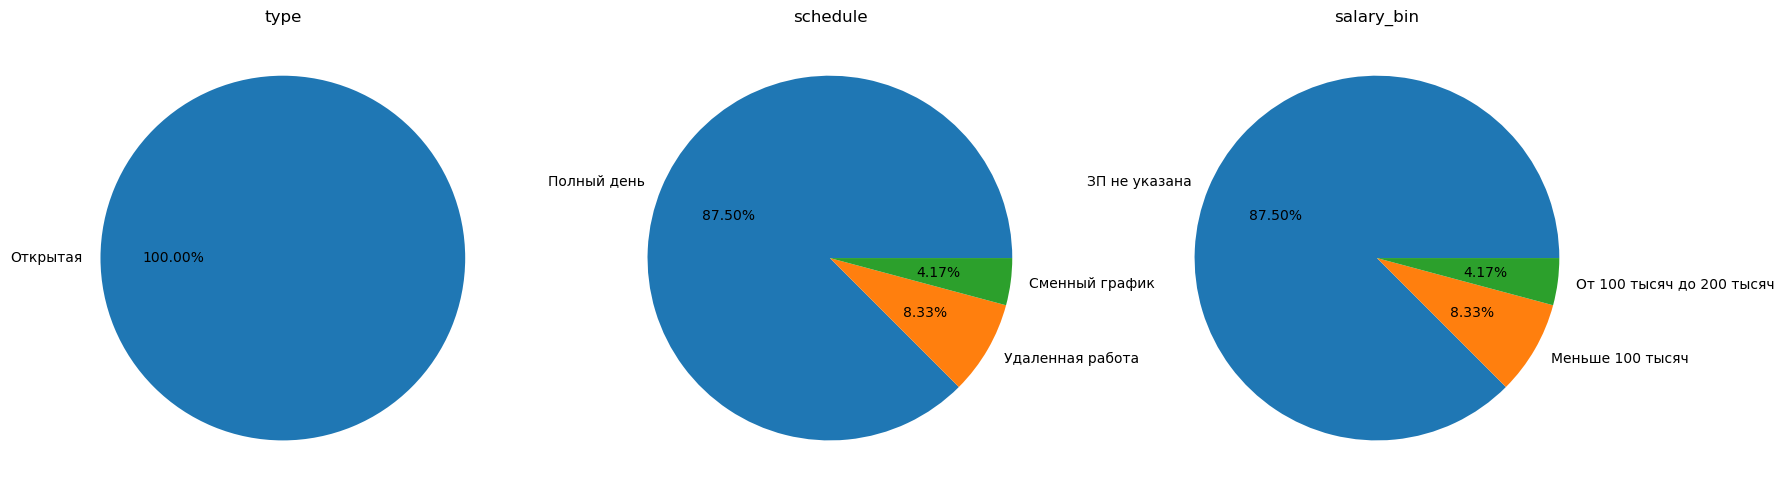

In [115]:
print('Тип работы, график, вилка зарплат для junior da')
visual(data_da_jun)

Тип работы, график, вилка зарплат для junior+ da


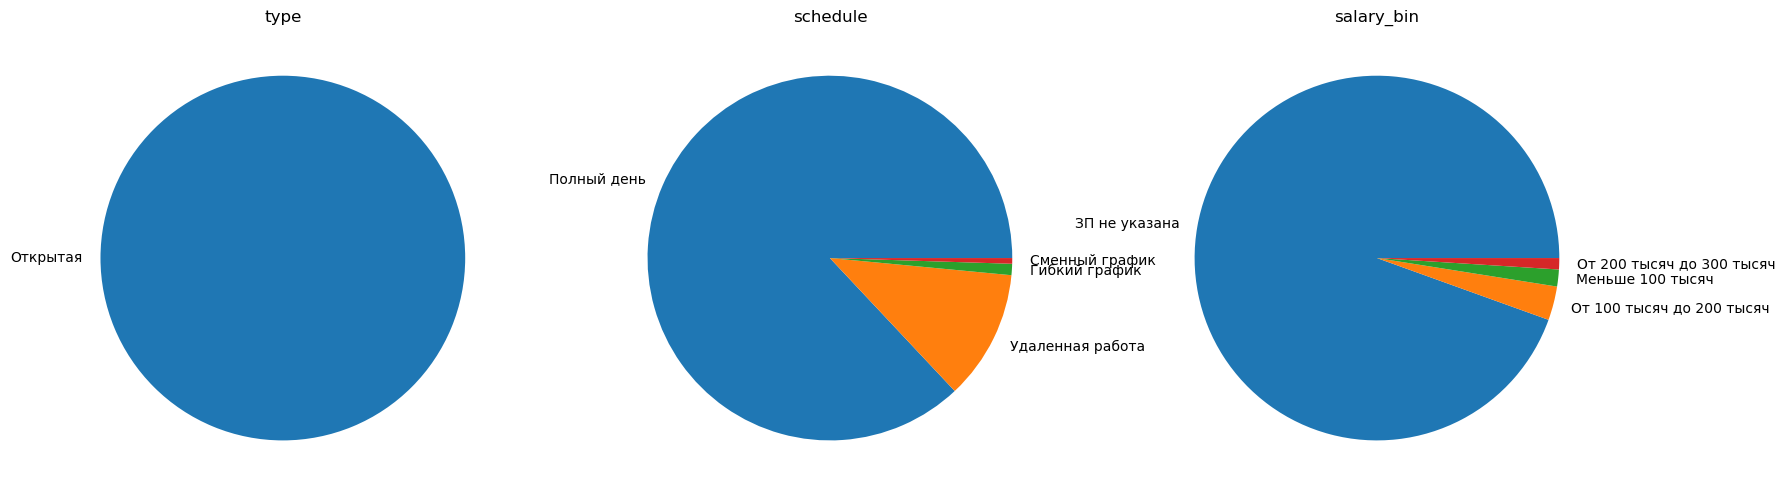

In [116]:
print('Тип работы, график, вилка зарплат для junior+ da')
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,15))
for ax,col in zip(axes.flatten(),cat_cols):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(data_da_junplus[col].value_counts(),labels=data_da_junplus[col].value_counts().index)

Тип работы, график, вилка зарплат для middle da


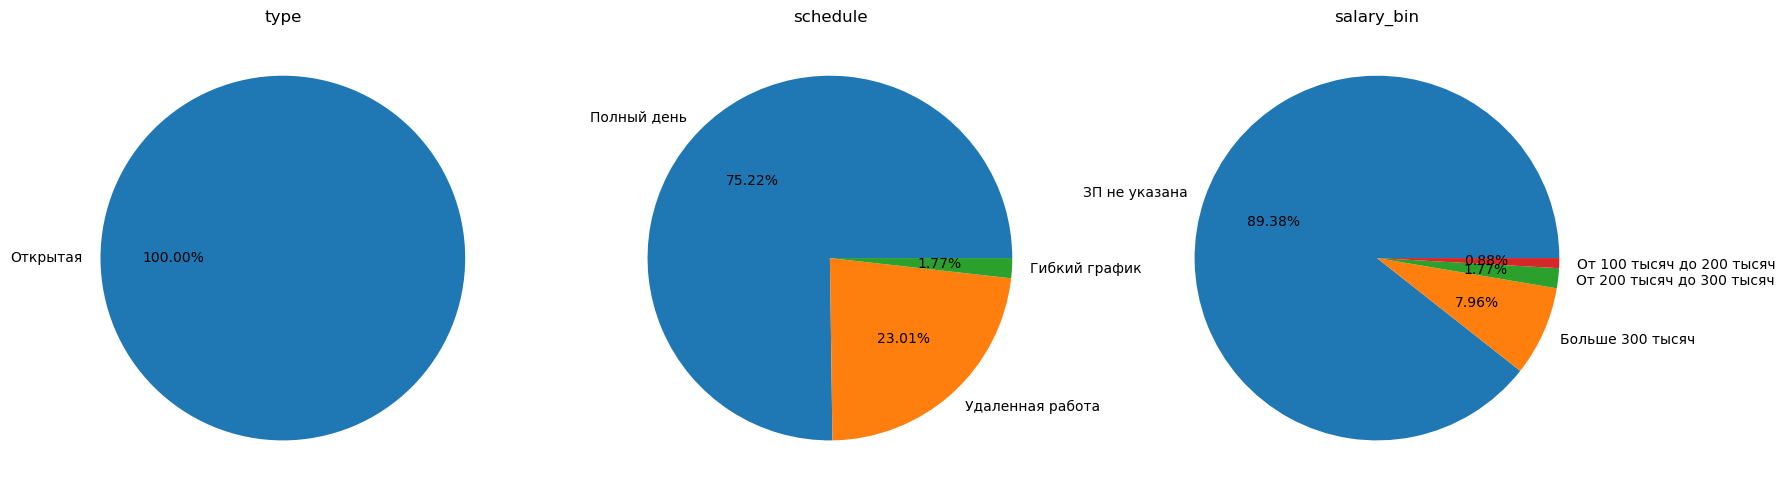

In [117]:
print('Тип работы, график, вилка зарплат для middle da')
visual(data_da_middle)

Заметим, что при повышении грейда увеличивается процент вакансий с удаленной работой, а также, увеличивается зарплата, 
что вполне логично

Теперь для бизнес-аналитиков

Тип работы, график, вилка зарплат для junior ba


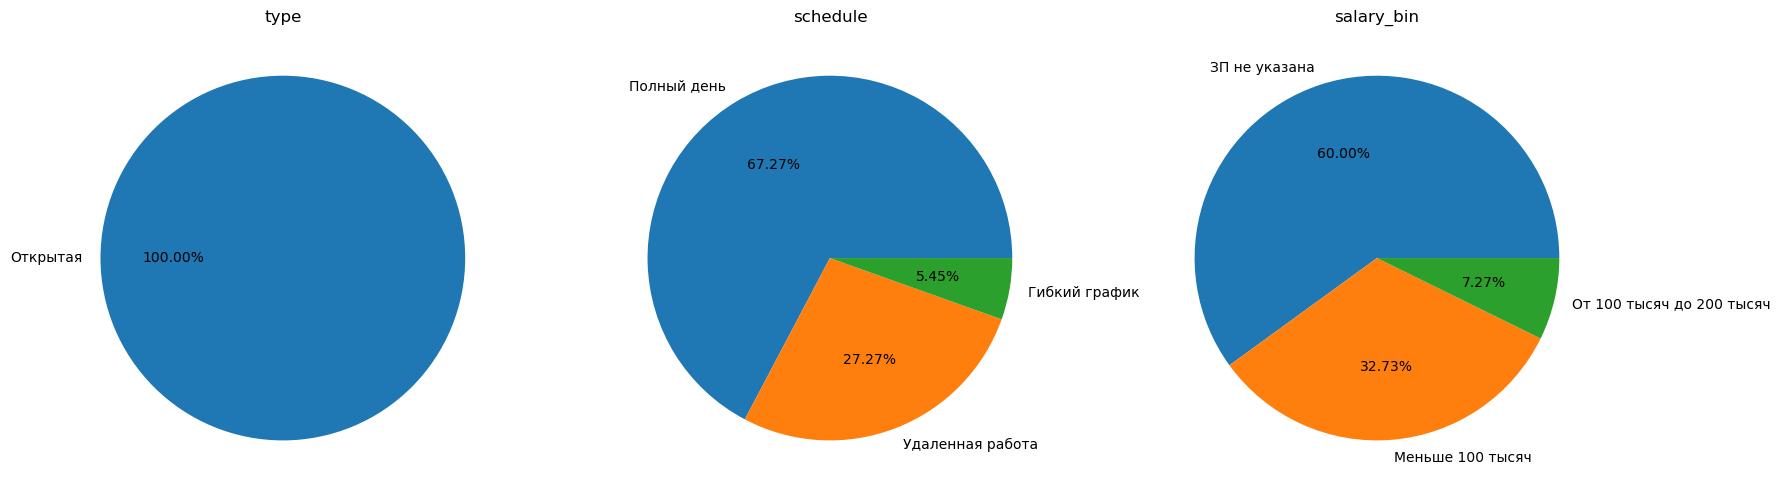

In [118]:
print('Тип работы, график, вилка зарплат для junior ba')
visual(data_ba_jun)

Тип работы, график, вилка зарплат для junior+ ba


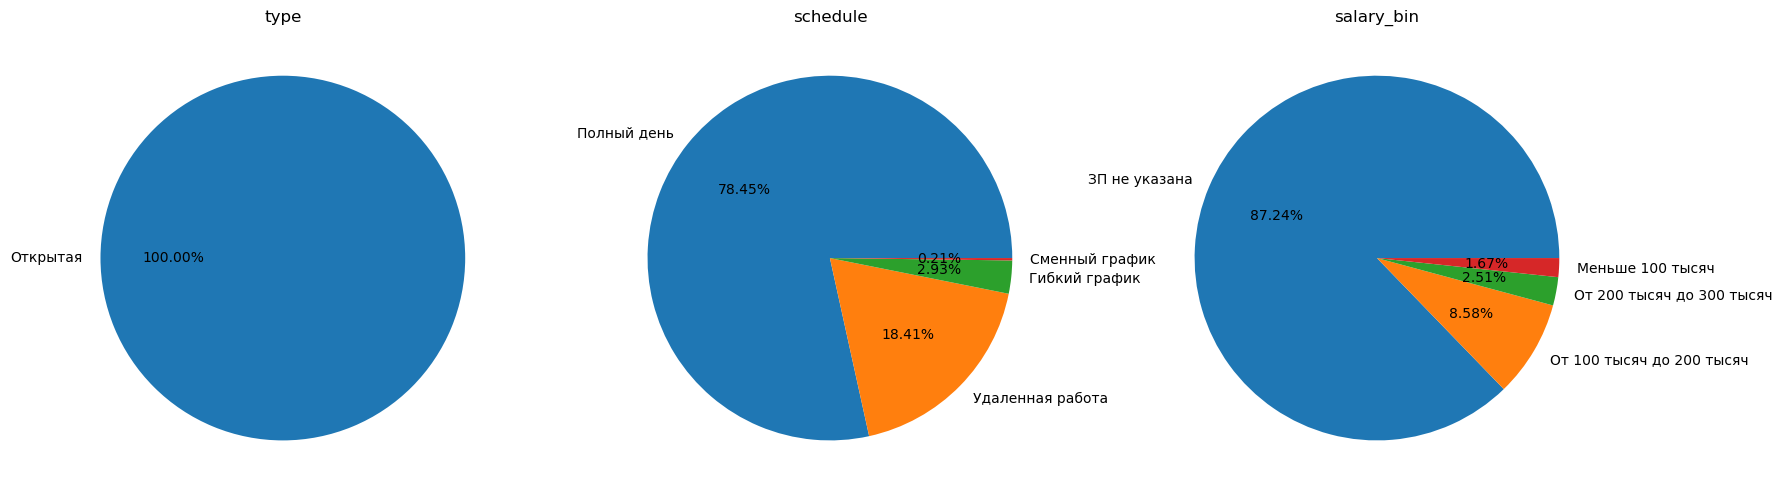

In [119]:
print('Тип работы, график, вилка зарплат для junior+ ba')
visual(data_ba_junplus)

Тип работы, график, вилка зарплат для middle ba


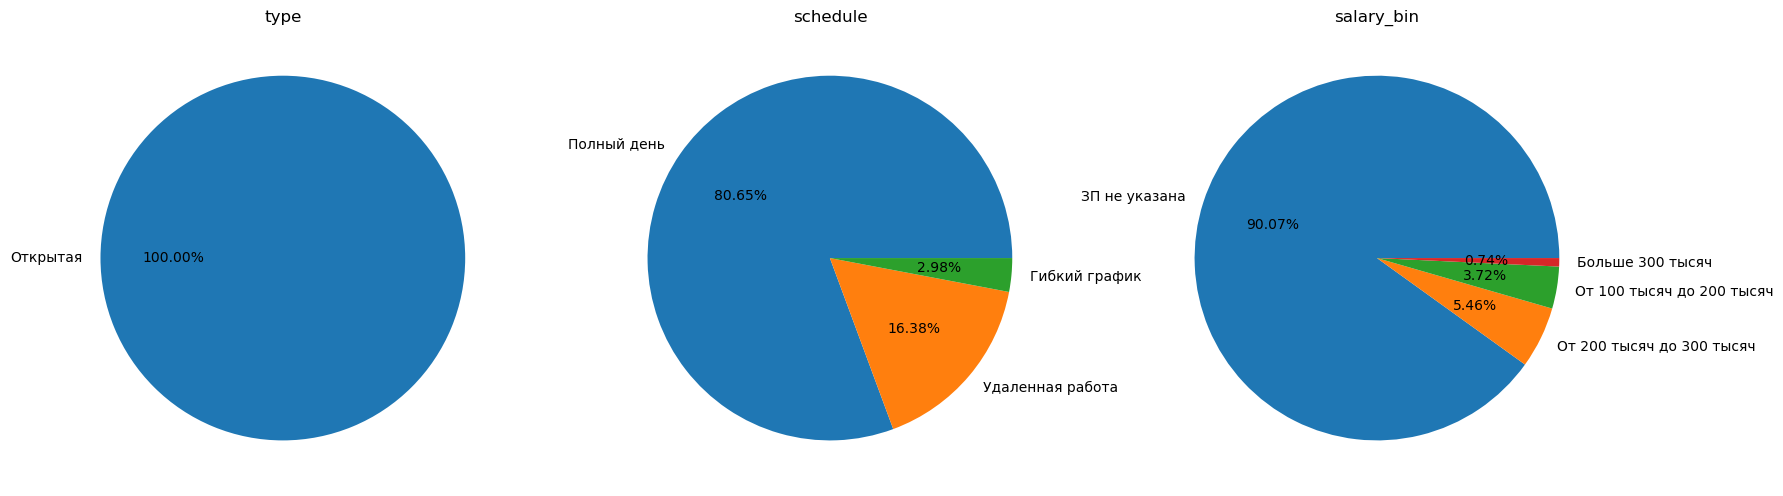

In [120]:
print('Тип работы, график, вилка зарплат для middle ba')
visual(data_ba_middle)

Тип работы, график, вилка зарплат для senior ba


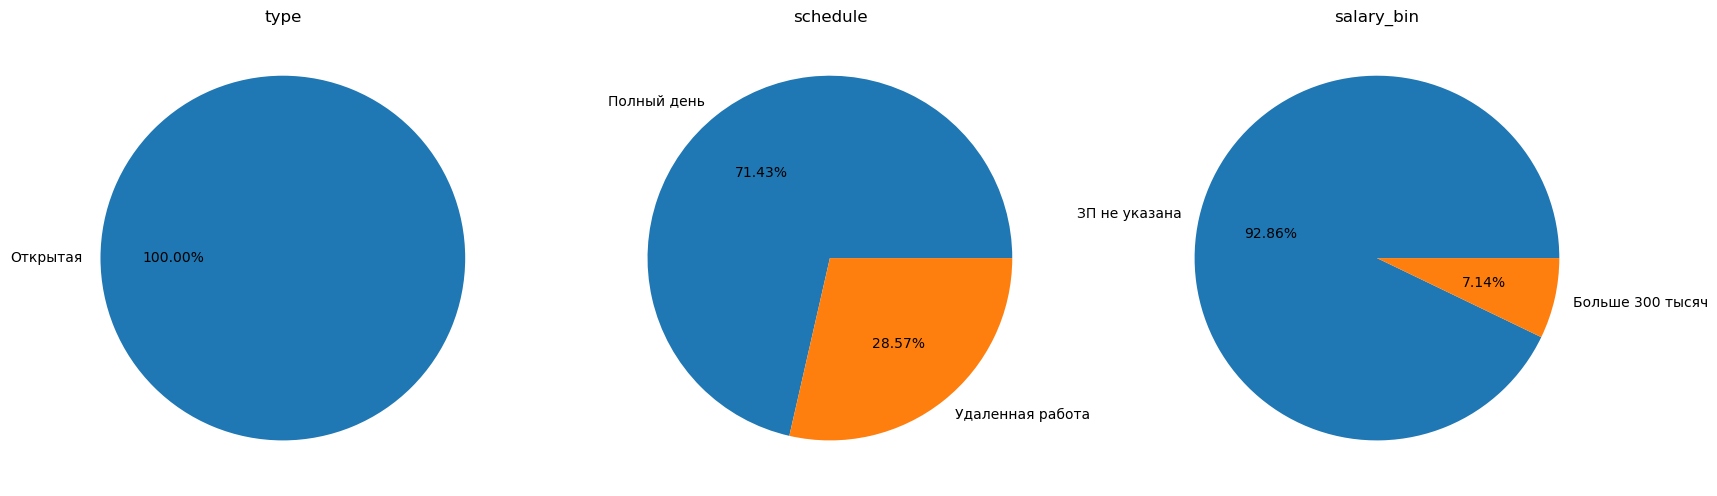

In [121]:
print('Тип работы, график, вилка зарплат для senior ba')
visual(data_ba_senior)

Для бизнес-аналитиков, в отличие от аналитиков данных при повышении грейда, за исключением senior процент вакансий с 
удаленной работой уменьшается. Зарплата, соответственно увеличивается

Теперь определим основных работодателей и распределение зарплат

In [122]:
def visual2(data,grade:str):
    top_emp=data['employer'].value_counts().head(10).reset_index()
    fig7=px.bar(top_emp,x='count',y='employer',orientation='h')
    mytitle=f'Toп компаний по кол-ву вакансий для {grade}'
    fig7.update_layout(title=mytitle
                   ,xaxis_title='количество вакансий',yaxis={'categoryorder':'total ascending'},yaxis_title='компании')
    fig7.update_layout(width=900,height=600)
    fig7.show()
    sns.set_theme(rc={'figure.figsize':(8,7)})
    sns.histplot(data['salary_from'],kde=True,bins=15);
    mytitle2=f'Зарплата у {grade} ,нижний порог'
    plt.title(mytitle2)
    plt.xlabel('начальный уровень зарплаты');
    plt.ylabel('количество предложений');

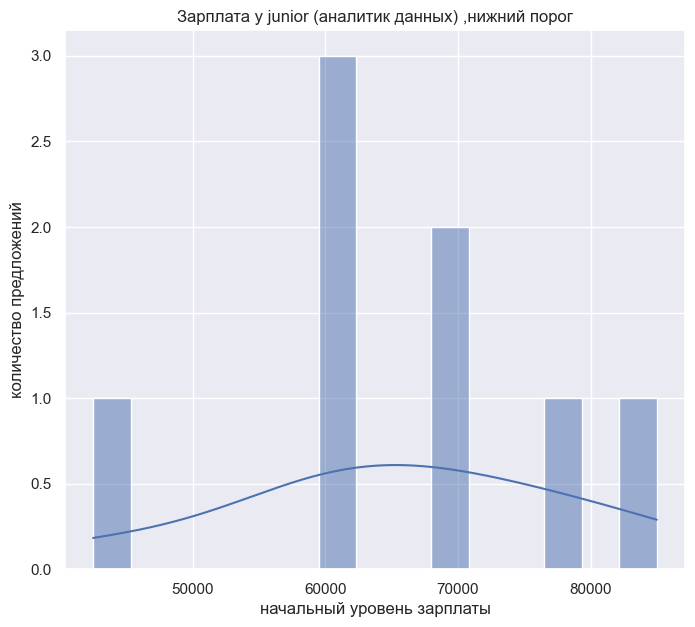

In [123]:

visual2(data_da_jun,'junior (аналитик данных)')

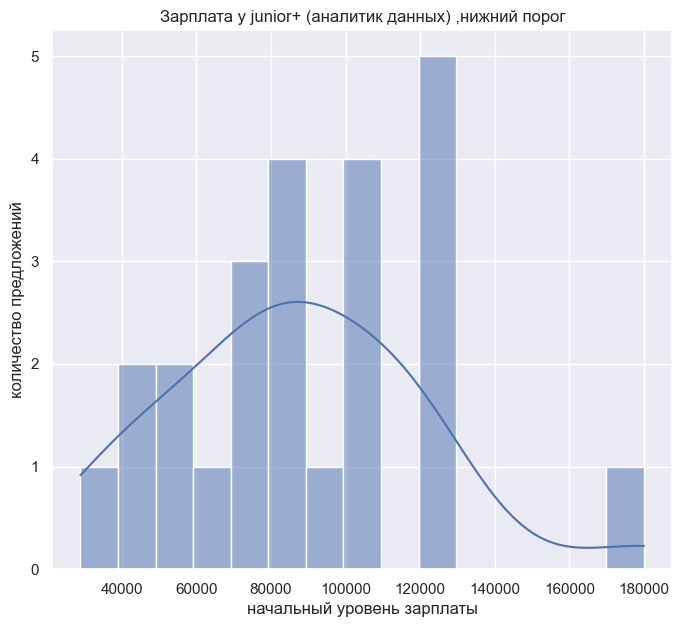

In [124]:
visual2(data_da_junplus,'junior+ (аналитик данных)')

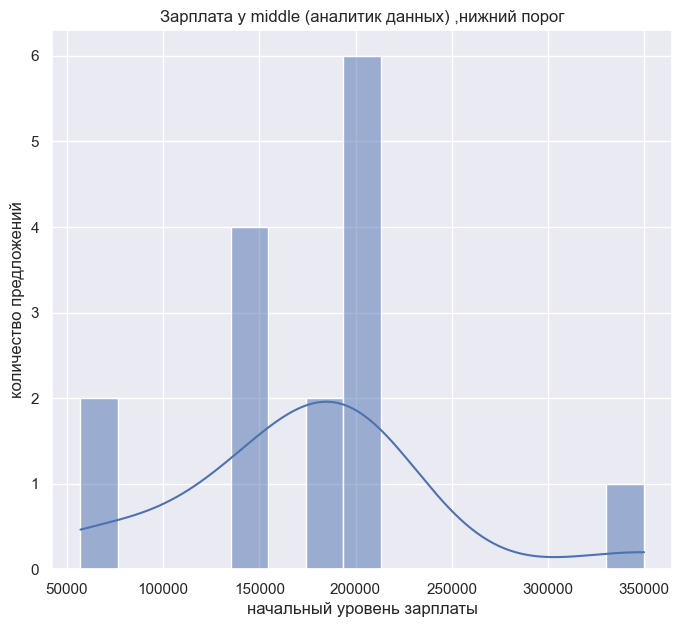

In [125]:
visual2(data_da_middle,'middle (аналитик данных)')

Главным работодателем аналитиков данных является Сбер, уровень зарплат имеет довольно большой разброс

Теперь выполним анализ для бизнес аналитиков

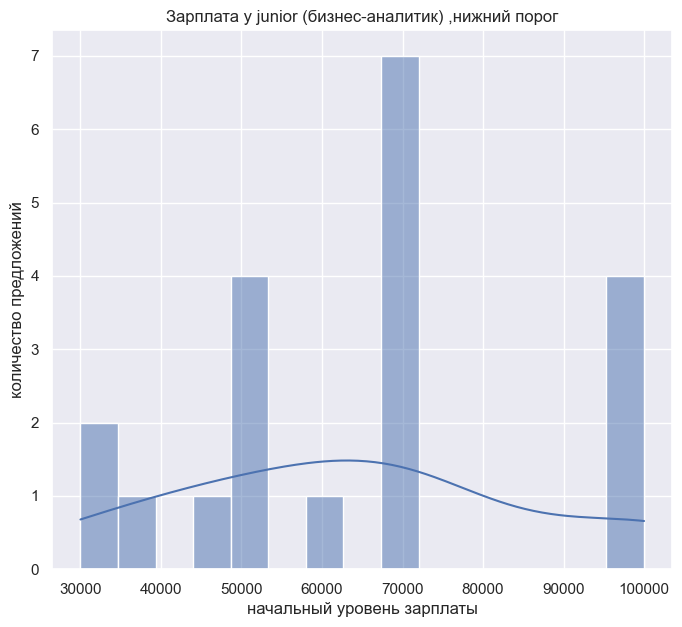

In [126]:
visual2(data_ba_jun,'junior (бизнес-аналитик)')

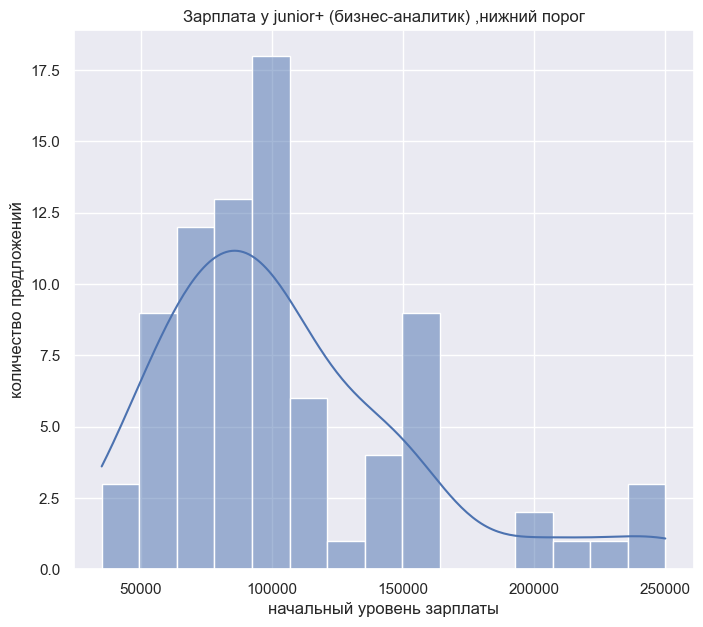

In [127]:
visual2(data_ba_junplus,'junior+ (бизнес-аналитик)')

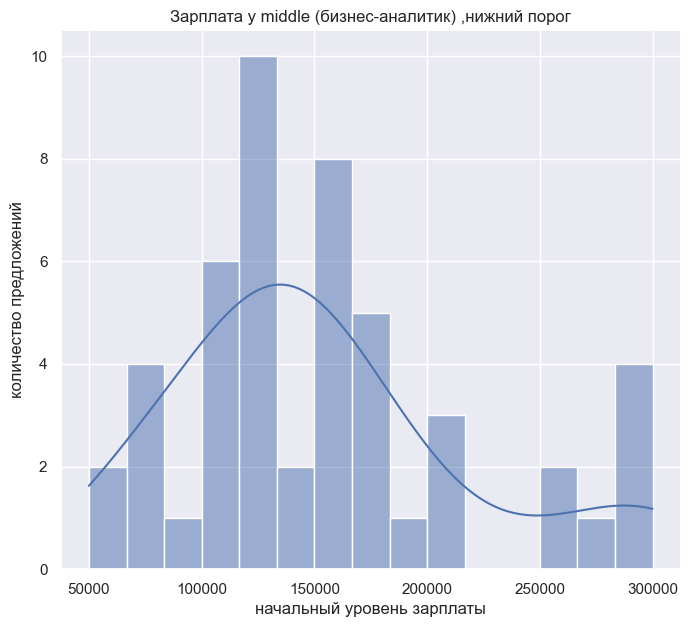

In [128]:
visual2(data_ba_middle,'middle (бизнес-аналитик)')

Теперь изучим тип работ для аналитиков данных  и бизнес аналитиков

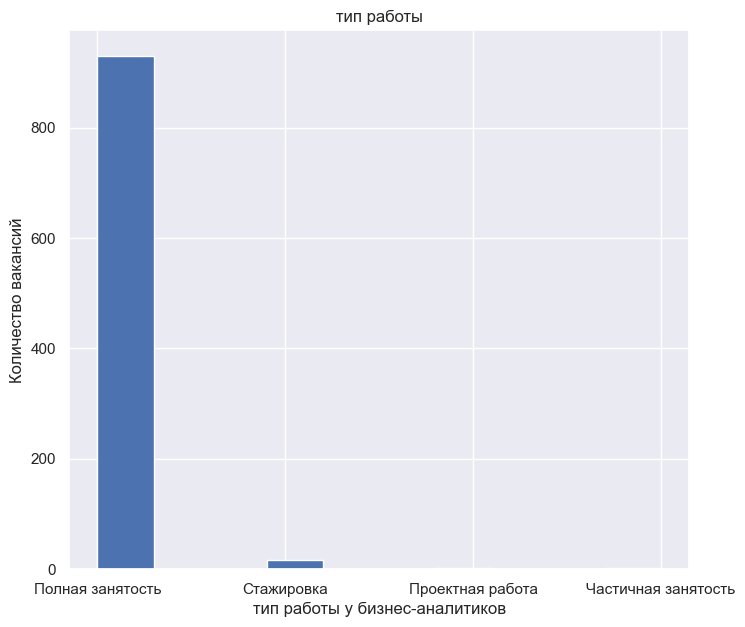

In [129]:
plt.hist(data_ba['employment']);
plt.xlabel('тип работы у бизнес-аналитиков')
plt.ylabel('Количество вакансий')
plt.title('тип работы');

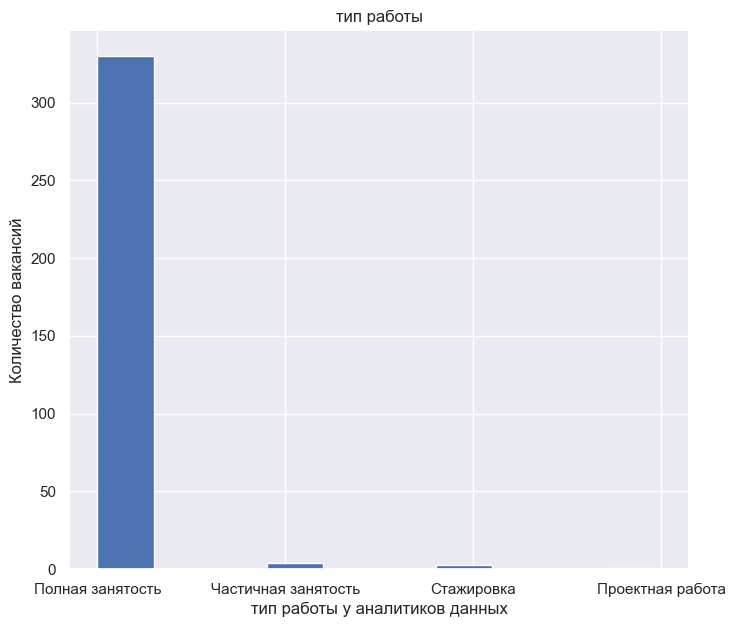

In [130]:
plt.hist(data_da['employment']);
plt.xlabel('тип работы у аналитиков данных')
plt.ylabel('Количество вакансий')
plt.title('тип работы');


Если рассматривать тип работы, то большинству работадателей нужны сотрудники на полной занятости, ввиду такого дисбаланса
 анализ по грейдам не будет иметь смысла. Отметим только, что стажеры обычно требуются на начальные позиции

Ранее было замечено, что присутствует довольно большой разброс зарплат. Для более точного анализа посмотрим 
данные в зависимости от города нахождения предприятий. Больше всего вакансий в Москве и Санкт-Петербурге, поэтому выделим
 эти города отдельно.
Проведем анализ без разделения на грейды ввиду небольшого набора данных 

In [131]:
data_da.query('area in ["Москва","Санкт-Петербург"]').describe()

published_at    salary_from      salary_to
count                            261      21.000000      16.000000
mean   2024-03-23 00:06:44.923371776  112764.047619  186474.687500
min              2024-03-12 21:40:27   60000.000000   78045.000000
25%              2024-03-18 17:08:06   78045.000000  100000.000000
50%              2024-03-22 19:18:25  100000.000000  145000.000000
75%              2024-03-27 10:01:31  120000.000000  238800.000000
max              2024-03-31 22:20:48  200000.000000  400000.000000
std                              NaN   46022.104950  102269.336973

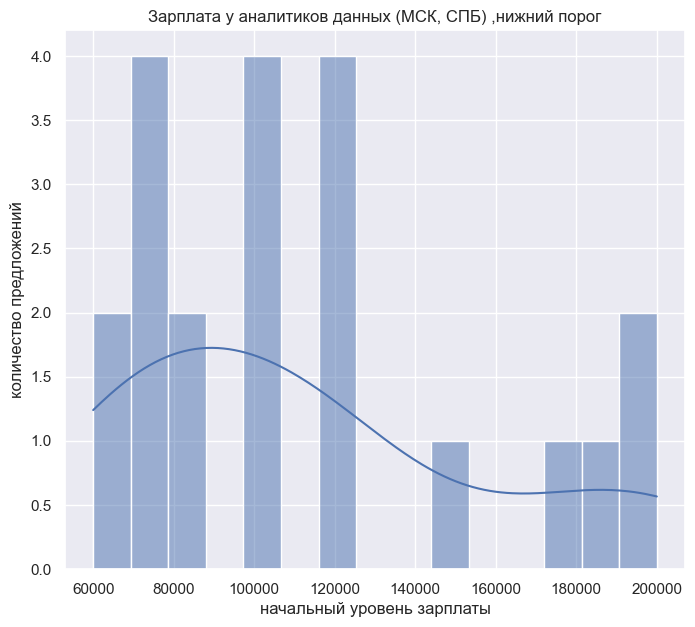

In [132]:
visual2(data_da.query('area in ["Москва","Санкт-Петербург"]'),'аналитиков данных (МСК, СПБ)')

In [133]:
data_da.query('area not in ["Москва","Санкт-Петербург"]').describe()

published_at    salary_from      salary_to
count                             77      26.000000      10.000000
mean   2024-03-21 23:18:58.389610496  110480.384615  224617.500000
min              2024-03-13 10:04:12   28940.000000   36175.000000
25%              2024-03-18 10:39:48   57750.000000  131250.000000
50%              2024-03-21 11:23:10   82000.000000  275000.000000
75%              2024-03-26 14:08:49  146750.000000  300000.000000
max              2024-03-29 16:50:53  350000.000000  400000.000000
std                              NaN   75382.484994  117675.834186

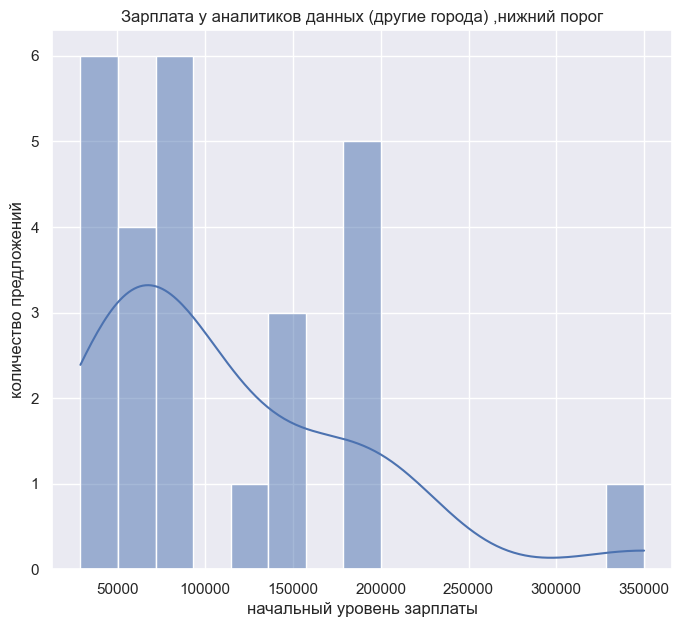

In [134]:
visual2(data_da.query('area not in ["Москва","Санкт-Петербург"]'),'аналитиков данных (другие города)')

In [135]:
data_ba.query('area in ["Москва","Санкт-Петербург"]').describe()

published_at    salary_from      salary_to
count                            674      68.000000      72.000000
mean   2024-03-22 17:53:37.357566720  149705.882353  181197.916667
min              2024-03-12 23:44:07   30000.000000   40000.000000
25%    2024-03-18 14:31:03.750000128  100000.000000  133750.000000
50%              2024-03-22 14:46:47  150000.000000  187500.000000
75%    2024-03-27 10:47:49.249999872  181750.000000  220000.000000
max              2024-03-31 18:20:38  300000.000000  400000.000000
std                              NaN   65364.890577   73143.308320

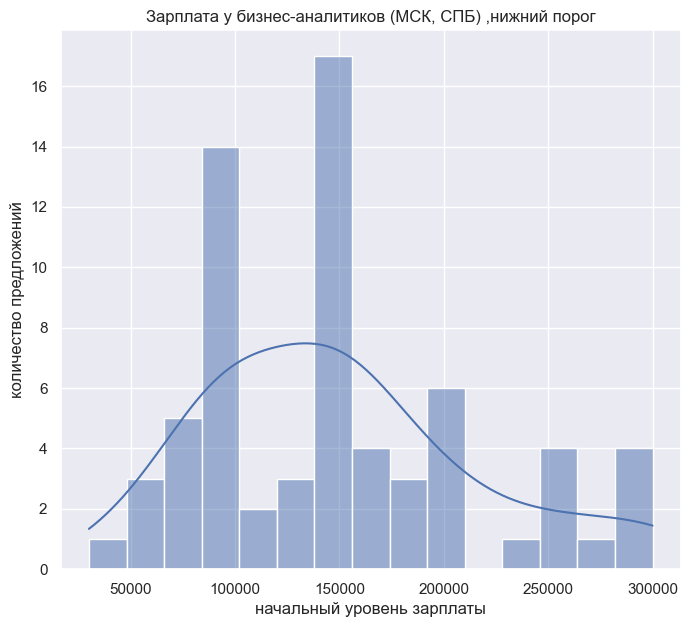

In [136]:
visual2(data_ba.query('area in ["Москва","Санкт-Петербург"]'),'бизнес-аналитиков (МСК, СПБ)')

In [137]:
data_ba.query('area not in ["Москва","Санкт-Петербург"]').describe()

published_at    salary_from      salary_to
count                            276      83.000000      52.000000
mean   2024-03-22 10:01:25.384057856   87475.506024  120649.230769
min              2024-03-13 08:04:28   30000.000000   55000.000000
25%              2024-03-18 16:49:07   67500.000000   80000.000000
50%              2024-03-21 16:25:18   78439.000000  105000.000000
75%    2024-03-27 08:06:19.750000128  100164.000000  163000.000000
max              2024-03-31 17:47:22  250000.000000  200000.000000
std                              NaN   35646.100856   46396.091023

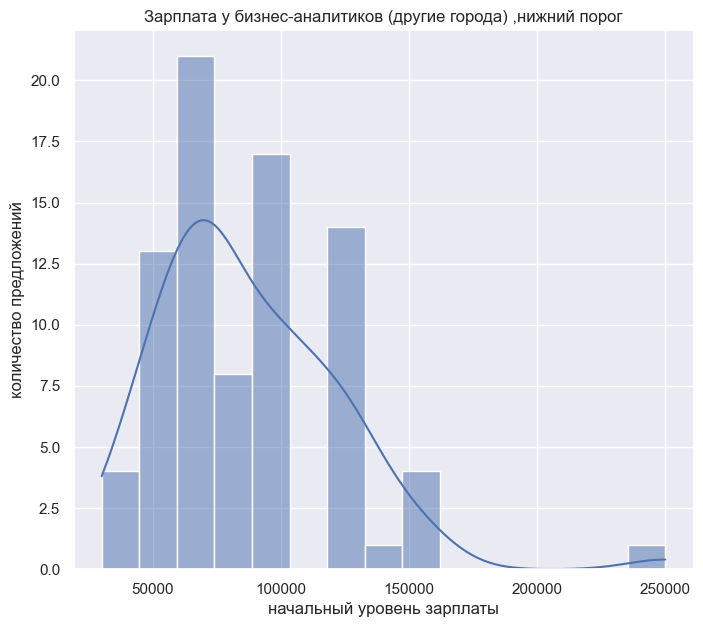

In [138]:
visual2(data_ba.query('area not in ["Москва","Санкт-Петербург"]'),'бизнес-аналитиков (другие города)')

В случае, если делать анализ  в зависимости от городов, стоит отметить, что для бизнес аналитиков в 1.5-2 раза меньше
 средняя зарплата, а также основным работодателем является Магнит, а не Сбер, как в Москве и Санкт-Петербурге. При 
    этом среди аналитиков данных основным работодателем остается Сбер, а средняя зарплата не сильно отличается в 
    зависимости от города, медианная зарплата при этом выше в более крупных городах

Заключение и выводы

В рамках работы был проанализирован рынок вакансий аналитиков данных и бизнес аналитиков. В общем, основные навыки, 
которыми должен обладать бизнес аналитик: уверенно разбираться в методах анализа бизнеса и их применения, bpmn и sql. Тогда как
     для аналитика данных основные навыки:sql, python, умение анализировать данные. У
различных грейдов требуемые навыки меняются не сильно, но при этом добавляются более сложные 
программы и разделы, и выше требования к базовым навыкам. Для обоих направлений работодатель хочет 
            видеть в качестве мягких навыков аналитическое мышление и умение работать с большим объемом информации. Большинство
     работодателей требуют полный рабочий день, а возможность работать удаленно увеличивается с повышением грейда у аналитиков 
        данных, при этом у бизнес аналитиков взаимосвязи нет. Также стоит отметить и местоположении компании, если у аналитиков
         данных нет сильного различия в средней зарплате и в основном работодателе в зависимости от региона, то у бизнес аналитиков
        в городах поменьше главным работодателем является Магнит, и средняя зарплата ниже. В рамках анализа было построено 
        множество различных графиков, проанализированы различные гипотезы, сделаны выводы после каждого пункта, к которым 
        может обращаться заказчик


**Ссылка на презентацию**

https://cloud.mail.ru/public/FxMG/rXBiDwimL

на всякий случай ссылка на colab

https://colab.research.google.com/drive/1LV3uHPjDgwN-usGhGlRG5rQ__QrO7STO?usp=sharing